<img src="img/affiche_formation_2.jpg" alt="Affiche Centrale IA Formation 2 Pandas + Statistiques exploratoires Amine Zaamoun" width="600" height="300"/>

# Pandas: La librairie d'analyse de données
[Pandas](https://pandas.pydata.org) est la bibliothèque de référence en langage de programmation Python quand il s'agit de devoir analyser et manipuler des données grâce à plusieurs points forts :

- des outils pour lire et écrire des données, qu'elles soient en mémoires (dictionnaires Python ou arrays Numpy par exemple) ou qu'elles proviennent de différents formats: fichiers CSV (comma-separated values) et texte, Microsoft Excel, bases de données SQL ou encore le format rapide HDF5 (Hierarchical Data Format 5)
- un alignement "intelligent" des données et un traitement intégré des données manquantes 
- un remodelage et pivotement flexibles des ensembles de données afin de pouvoir les réordonner selon l'envie
- un découpage basé sur les étiquettes des données, ce qui facilite la compréhension du code
- la possibilité d'insérer et de supprimer des colonnes ou lignes des structures de données
- la possibilité d'aggréger et de transformer des données avec un puissant moteur de regroupement permettant d'effectuer des opérations de fractionnement, de combinaison et d'application de fonction
- des performances de calculs hautement optimisées, à l'aide d'un noyau codé en C au même titre que la librairie Numpy
- elle s'interface parfaitement avec d'autres librairies Python utiles en Data Science
- sa syntaxe de haut niveau, se rapprochant de l'anglais comme Python, la rend facile à utilisé et accessible à tous
- elle est open source, distribuée sous une licence BSD 3-Clause et maintenue publiquement sur [GitHub](https://github.com/pandas-dev/pandas) par plus de 2000 contributeurs

## La classe DataFrame
La classe d'objets que nous allons principalement utiliser est la classe **DataFrame** de Pandas, qui se présente sous la forme d'une matrice dont chaque ligne et chaque colonne porte un indice. Elle s'apparente à un tableau qui propose une manipulation et exploration de données plus avancées que les arrays Numpy, notamment par le fait que chacune de ses lignes et chacune de ses colonnes portent un indice qui peut être personnalisé. Son utilisation principale est de stocker des bases de données, dont les différentes **entrées** (individus, dossiers, clics, ...) sont les différentes **lignes** et les différentes **caractéristiques** sont les différentes **colonnes**.

Concernant l'analyse de données, cette classe présente plusieurs avantages par rapport à un la classe array de Numpy :
- un DataFrame est beaucoup plus lisible grâce à une indexation des colonnes et des lignes plus explicites
- le type des éléments peut varier d'une colonne à l'autre (même si au sein d'une même colonne, les éléments sont du même type), ce qui permet de stocker des bases de données très variées contrairement aux arrays Numpy, qui ne supportent que des données du même type au sein de toute la matrice
- elle contient beaucoup plus de méthodes pour le nettoyage, le pré-traitement et la manipulation de bases de données

In [1]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category = SettingWithCopyWarning)

In [2]:
# Import de la bibliothèque Pandas sous l'alias pd (c'est une convention dans la communauté des développeurs Python)
import pandas as pd

### Création d'un DataFrame
Un DataFrame Pandas peut être instantié de plusieurs manières, la principale étant à l'aide du constructeur suivant et ses 3 arguments principaux ([il y en a plus](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) :
```python
pd.DataFrame(data, index, columns, ...)

```
- le paramètre `data` contient les **données** à mettre en forme (array NumPy, liste, dictionnaire ou un autre DataFrame).
- le paramètre `index`, si précisé, doit être une **liste** contenant les **indices des entrées**.
- le paramètre `columns`, si précisé, doit être une **liste** contenant le **nom des colonnes**.

#### Création d'un DataFrame à partir d'un array Numpy
L'inconvénient de cette méthode est que le type de données est obligatoirement numérique et doit être le même pour l'ensemble du jeu de données, ce qui fait perdre à la classe DataFrame sa flexibilité par rapport aux arrays Numpy.

In [3]:
# Import de la librairie Numpy sous l'alias np
import numpy as np

# Création d'un array Numpy
array = np.array([[1, 2, 3, 4], 
                  [5, 6, 7, 8], 
                  [9, 10, 11, 12]])

# Instanciation d'un DataFrame nommé df à partir de l'array Numpy
df = pd.DataFrame(data = array)

# Affichage du DataFrame df
print(df)

   0   1   2   3
0  1   2   3   4
1  5   6   7   8
2  9  10  11  12


In [4]:
# Affichage propre en sortie de la cellule en utilisant l'interface IPython de Jupyter Notebook
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


Pour que cet affichage propre se fasse, il faut que le nom du DataFrame, ici `df`, soit la dernière instruction de la celulle de code.

In [5]:
# Instanciation d'un DataFrame nommé df à partir de l'array Numpy en précisant les indices et le nom des colonnes dans une liste
df = pd.DataFrame(data = array,
                  index = ['premier indice', 'deuxième indice', 'troisième indice'],
                  columns = ['première caractéristique', 'deuxième caractéristique', 'troisième caractéristique', 'quatrième caractéristique'])

df

,première caractéristique,deuxième caractéristique,troisième caractéristique,quatrième caractéristique
premier indice,1,2,3,4
deuxième indice,5,6,7,8
troisième indice,9,10,11,12


#### Création d'un DataFrame à partir d'un dictionnaire
L'avantage de cette méthode par rapport à la précédente est de pouvoir stocker des données de plusieurs types différents dans chaque colonne. Les colonnes sont d'ailleurs directement définies dans le dictionnaire et correspondent aux clés des éléments.

In [6]:
# Création d'un dictionnaire
dict_CentraleIA = {'Nom': ['Benichou', 'El Mahdi', 'Lenglet', 'Peyré', 'Zaamoun', 'Skewes', 'Caron', 'Purim'], 
                'Prénom': ['Yaniv', 'Karim', 'Marie', 'Antoine', 'Amine', 'Pablo', 'Mathieu', 'Andreis'],
                'Sexe': ['M', 'M', 'F', 'M', 'M', 'M', 'M', 'M'],
                'Taille': [186, 172, 170, 175, 176, 177, 173, 180],
                'Âge': [22, 20, 21, 20, 21, 22, 20, 22],
                'Rôle': ['Prez', 'Vice-Prez', 'Screz', 'Trez', 'Respo Formation', 'Respo Evénement', 'Respo Com', 'Respo Entreprise']}

# Instanciation d'un DataFrame 
df_CentraleIA = pd.DataFrame(data = dict_CentraleIA,
                  index = ['i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'i_6', 'i_7', 'i_8'])

df_CentraleIA

,Nom,Prénom,Sexe,Taille,Âge,Rôle
i_1,Benichou,Yaniv,M,186,22,Prez
i_2,El Mahdi,Karim,M,172,20,Vice-Prez
i_3,Lenglet,Marie,F,170,21,Screz
i_4,Peyré,Antoine,M,175,20,Trez
i_5,Zaamoun,Amine,M,176,21,Respo Formation
i_6,Skewes,Pablo,M,177,22,Respo Evénement
i_7,Caron,Mathieu,M,173,20,Respo Com
i_8,Purim,Andreis,M,180,22,Respo Entreprise


#### Création d'un DataFrame à partir d'un fichier de données
En général, les DataFrame sont directement créés à partir de fichier contenant les données voulues, que ce soit du format CSV, Texte ou encore Excel, même si le format CSV (Comma Separated Values) est le plus courant. Par rapport à l'exemple précédent sur les membres du bureau actuel de l'association Centrale IA, le fichier aurait ressemblé à ça :
```csv
Nom, Prénom, Sexe, Taille, Âge, Rôle
Benichou, Yaniv, M, 186, 22, Prez
El Mahdi, Karim, M, 175, 22, Vice-Prez
Lenglet, Marie, F, 175, 22, Screz
Peyré, Antoine, M, 175, 22, Trez
Zaamoun, Amine, M, 176, 22, Respo Formation
Skewes, Pablo, M, 176, 22, Respo Evénement
Caron, Mathieu, M, 173, 20, Respo Com
Purim, Andreis, M, 180, 22, Respo Entreprise
```
On peut remarquer que :
- chaque ligne correspond à une entrée de la base de données, donc dans ce cas, les entrées correspondent à des membres du bureau de Centrale IA
- la première ligne contient le nom des colonnes, même s'il est tout à fait possible d'avoir un fichier CSV sans que le nom des colonnes ne soit spécifié
- les valeurs sont séparées par un caractère de séparation. Dans cet exemple, il s'agit de la virgule ',' mais il peut très bien s'agir du point-virgule ';'

Pour importer des données provenant d'un fichier de ce format (ou du format `.data` que l'on peut retrouver dans plusieurs jeux de données [ici](http://archive.ics.uci.edu/ml)), il faut utiliser la [fonction suivante](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) :
```python
pd.read_csv(filepath_or_buffer, sep, header, index_col, ...)
```
Ses arguments incontournables sont :
- `filepath_or_buffer`: Le chemin d'accès du fichier .csv relativement à l'environnement d'éxécution. Si le fichier se trouve dans le même dossier que l'environnement Python, il suffit de renseigner le nom du fichier. Ce chemin doit être renseigné sous forme de chaîne de caractères.
- `sep`: Le caractère utilisé dans le fichier .csv pour séparer les différentes colonnes. Cet argument doit être specifié sous forme de caractère.
- `header`: Le numéro de la ligne qui contient les noms des colonnes. Si par exemple les noms de colonnes sont renseignés dans la première ligne du fichier .csv, alors il faut spécifier header = 0. Si les noms ne sont pas renseignés, on mettra header = None.
- `index_col`: Le nom ou numéro de la colonne contenant les indices de la base de données. Si les entrées de la base sont indexées par la première colonne, il faudra renseigner index_col = 0. Alternativement, si les entrées sont indexées par une colonne qui porte le nom "Id", on pourra spécifier index_col = "Id".

Cette fonction retournera un objet de type DataFrame contenant toutes les données du fichier importé.

In [7]:
# Import du fichier 'german_credit_risk.data' dans un DataFrame nommé df
df = pd.read_csv('german_credit_risk.data', sep = ' ', header = None, index_col = None)

# Affichage du DataFrame df en sortie
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6.0,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,A14,12.0,A32,A42,1736.0,A61,A74,3,A92,A101,...,A121,31.0,A143,A152,1,A172,1,A191,A201,1
1018,A11,30.0,A32,A41,3857.0,A61,A73,4,A91,A101,...,A122,40.0,A143,A152,1,A174,1,A192,A201,1
1019,A14,12.0,A32,A43,804.0,A61,A75,4,A93,A101,...,A123,38.0,A143,A152,1,A173,1,A191,A201,1
1020,A11,45.0,A32,A43,1845.0,A61,A73,4,A93,A101,...,A124,23.0,A143,A153,1,A173,1,A192,A201,2


Le [jeu de données](https://www.kaggle.com/kabure/german-credit-data-with-risk) que nous venons d'importer représente classe des individus décrits par un ensemble d'attributs en tant que bons ou mauvais risques de crédit. Il peut typiquement servir à faire ce qu'on appelle du "scoring" d'octroi de crédit, c'est-à-dire concevoir un modèle statistique permettant de prédire si une personne est solvable ou non, en fonction de ses caractéristiques. La partie modélisation sera abordée dans un autre formation plus tard concernant les modèles de Machine Learning.

Pour le moment, continuons à en apprendre plus sur la librairie Pandas tout en nous intéressons particulièrement aux données qui constituent ce fichier et essayons de se l'approprier en l'analysant statistiquement. Cette étape d'appropriation du jeu de données avec lequel on travaille, ainsi que les nettoyage des données, constituent près de 80% du travail du Data Scientist et permettent de modéliser au mieux car une bonne connaissance des données avec lesquelles nous travaillons est primordial.

Les caractéristiques des individus et leurs types sont les suivants :

Attribute 1: (qualitative)\
**Status of existing checking account** (*Statut du compte chèque existant*)
- A11 : ... < 0 DM
- A12 : 0 <= ... < 200 DM
- A13 : ... >= 200 DM / salary assignments for at least 1 year
- A14 : no checking account
    
Attribute 2: (numerical)\
**Duration** in month (*Durée en mois*)

Attribute 3: (qualitative)\
**Credit history** (*Historique des crédits*)
- A30 : no credits taken/ all credits paid back duly
- A31 : all credits at this bank paid back duly
- A32 : existing credits paid back duly till now
- A33 : delay in paying off in the past
- A34 : critical account / other credits existing (not at this bank)
    
Attribute 4: (qualitative)\
**Purpose** (*Raison pour laquelle le crédit a été accordé*)
- A40 : car (new)
- A41 : car (used)
- A42 : furniture/equipment
- A43 : radio/television
- A44 : domestic appliances
- A45 : repairs
- A46 : education
- A47 : (vacation - does not exist?)
- A48 : retraining
- A49 : business
- A410 : others

Attribute 5: (numerical)\
**Credit amount** (*Montant du crédit*)

Attibute 6: (qualitative)\
**Savings account/bonds** (*Compte d'épargne/obligations*)
- A61 : ... < 100 DM (Deutsche Mark)
- A62 : 100 <= ... < 500 DM
- A63 : 500 <= ... < 1000 DM
- A64 : .. >= 1000 DM
- A65 : unknown/ no savings account


Attribute 7: (qualitative)\
**Present employment since** (*Emploi actuel et depuis combien de temps*)
- A71 : unemployed
- A72 : ... < 1 year
- A73 : 1 <= ... < 4 years
- A74 : 4 <= ... < 7 years
- A75 : .. >= 7 years

Attribute 8: (numerical)\
**Installment rate** in percentage of disposable income (*Taux de versement en pourcentage du revenu disponible*)


Attribute 9: (qualitative)\
**Personal status and sex** (*Statut marital et sexe de l'individu*)
- A91 : male : divorced/separated
- A92 : female : divorced/separated/married
- A93 : male : single
- A94 : male : married/widowed
- A95 : female : single


Attribute 10: (qualitative)\
**Other debtors/guarantors** (*Autres débiteurs/garants*)
- A101 : none
- A102 : co-applicant
- A103 : guarantor


Attribute 11: (numerical)\
**Present residence since** (*Résidence actuelle depuis combien de temps*)


Attribute 12: (qualitative)\
**Property** (*Propriété*)
    - A121 : real estate
    - A122 : if not A121 : building society savings agreement/ life insurance
    - A123 : if not A121/A122 : car or other, not in attribute 6
    - A124 : unknown / no property


Attribute 13: (numerical)\
**Age** in years (*Âge en années*)


Attribute 14: (qualitative)\
**Other installment plans** (*Autres plans de paiement*)
- A141 : bank
- A142 : stores
- A143 : none

Attribute 15: (qualitative)\
**Housing** (*Logement*)
- A151 : rent
- A152 : own
- A153 : for free


Attribute 16: (numerical)\
**Number of existing credits** at this bank (*Nombre de crédits existants dans cette banque*)


Attribute 17: (qualitative)\
**Job** (*Emploi*)
- A171 : unemployed/ unskilled - non-resident
- A172 : unskilled - resident
- A173 : skilled employee / official
- A174 : management/ self-employed / highly qualified employee / officer

Attribute 18: (numerical)\
**Number of people being liable** to provide maintenance for (*Nombre de personnes tenus de subvenir aux besoins de l'individu en question*)

Attribute 19: (qualitative)\
**Telephone** (*Téléphone*)
- A191 : none
- A192 : yes, registered under the customers name

Attribute 20: (qualitative)\
**Foreign worker** (*Travailleur étranger*) 
- A201 : yes
- A202 : no

La variable cible `Risk` (21ème et dernière colonne) contient 2 modalités: 1 pour 'Good Risk' et 2 pour 'Bad Risk'.

In [8]:
# Remplacement des noms de colonnes actuels par des noms plus explicites
df.columns = ['Status of existing checking account',
              'Duration',
              'Credit history',
              'Purpose',
              'Credit amount',
              'Savings account/bonds',
              'Present employment since',
              'Installment rate',
              'Personal status and sex', 'Other debtors/guarantors',
              'Present residence since', 'Property',
              'Age',
              'Other installment plans',
              'Housing', 'Number of existing credits',
              'Job',
              'Number of people being liable',
              'Telephone',
              'Foreign worker',
              'Risk']

df.columns

Index(['Status of existing checking account', 'Duration', 'Credit history',
       'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since', 'Installment rate',
       'Personal status and sex', 'Other debtors/guarantors',
       'Present residence since', 'Property', 'Age', 'Other installment plans',
       'Housing', 'Number of existing credits', 'Job',
       'Number of people being liable', 'Telephone', 'Foreign worker', 'Risk'],
      dtype='object')

### Aperçu d'un DataFrame

In [9]:
# Affichage des 10 premières lignes du DataFrame df
df.head(10)

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
0,A11,6.0,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,2
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35.0,A143,A153,1,A172,2,A192,A201,1
6,A14,24.0,A32,A42,2835.0,A63,A75,3,A93,A101,...,A122,53.0,A143,A152,1,A173,1,A191,A201,1
7,A12,36.0,A32,A41,6948.0,A61,A73,2,A93,A101,...,A123,35.0,A143,A151,1,A174,1,A192,A201,1
8,A14,12.0,A32,A43,3059.0,A64,A74,2,A91,A101,...,A121,61.0,A143,A152,1,A172,1,A191,A201,1
9,A11,6.0,A34,A43,NaN,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1


In [10]:
# Affichage des 20 dernières lignes du DataFrame df
df.tail(20)

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
1002,A14,24.0,A34,A42,2028.0,A61,A74,2,A93,A101,...,A122,30.0,A143,A152,2,A172,1,A191,A201,1
1003,A11,15.0,A34,A42,1433.0,A61,A73,4,A92,A101,...,A122,25.0,A143,A151,2,A173,1,A191,A201,1
1004,A13,42.0,A30,A49,6289.0,A61,A72,2,A91,A101,...,A122,33.0,A143,A152,2,A173,1,A191,A201,1
1005,A13,9.0,A32,A43,745.0,A61,A73,3,A92,A101,...,A121,28.0,A143,A152,1,A172,1,A191,A201,2
1006,A12,6.0,A32,A43,2063.0,A61,A72,4,A94,A101,...,A123,30.0,A143,A151,1,A174,1,A192,A201,1
1007,A12,60.0,A32,A46,6288.0,A61,A73,4,A93,A101,...,A124,42.0,A143,A153,1,A173,1,A191,A201,2
1008,A14,24.0,A34,A41,6842.0,A65,A73,2,A93,A101,...,A122,46.0,A143,A152,2,A174,2,A192,A201,1
1009,A14,13.0,A32,A43,1409.0,A62,A71,2,A92,A101,...,A121,64.0,A143,A152,1,A173,1,A191,A201,1
1010,A11,24.0,A32,A41,6579.0,A61,A71,4,A93,A101,...,A124,29.0,A143,A153,1,A174,1,A192,A201,1
1011,A12,24.0,A34,A43,1743.0,A61,A75,4,A93,A101,...,A122,48.0,A143,A152,2,A172,1,A191,A201,1


### Informations sur un DataFrame

In [11]:
# Affichage des dimensions du DataFrame df
df.shape

(1022, 21)

In [12]:
# Affichage de quelques informations sur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Status of existing checking account  1020 non-null   object 
 1   Duration                             1021 non-null   float64
 2   Credit history                       1021 non-null   object 
 3   Purpose                              1017 non-null   object 
 4   Credit amount                        1018 non-null   float64
 5   Savings account/bonds                1018 non-null   object 
 6   Present employment since             1021 non-null   object 
 7   Installment rate                     1022 non-null   int64  
 8   Personal status and sex              1022 non-null   object 
 9   Other debtors/guarantors             1022 non-null   object 
 10  Present residence since              1022 non-null   int64  
 11  Property                      

### Sélection de colonnes d'un DataFrame

In [13]:
# Sélection de la colonne nommée 'Number of existing credits'
df['Number of existing credits']

0       2
1       1
2       1
3       1
4       2
       ..
1017    1
1018    1
1019    1
1020    1
1021    1
Name: Number of existing credits, Length: 1022, dtype: int64

Lorsque l'on sélectionne une seule colonne, l'objet renvoyé par Pandas est de type `Series`. Ce type particulier fonctionne de la même façon qu'une liste voire d'un array Numpy à une seule dimension.

Ainsi, on peut accéder à la valeur stockée dans la ligne d'indice 4 de la Series renvoyée par la sélection de la colonne 'Number of existing credits' en procédant de cette manière :

In [14]:
# Indexation de la Series renvoyée par la sélection de la colonne 'Number of existing credits'
df['Number of existing credits'][4]

2

In [15]:
# Extraction d'un sous-DataFrame contenant les colonnes 'Credit amount' et 'Purpose'
df[['Credit amount', 'Purpose']]

#A40 : car (new)
#A41 : car (used)
#A42 : furniture/equipment
#A43 : radio/television
#A44 : domestic appliances
#A45 : repairs
#A46 : education
#A47 : (vacation - does not exist?)
#A48 : retraining
#A49 : business
#A410 : others

,Credit amount,Purpose
0,1169.0,A43
1,5951.0,A43
2,2096.0,A46
3,7882.0,A42
4,4870.0,A40
...,...,...
1017,1736.0,A42
1018,3857.0,A41
1019,804.0,A43
1020,1845.0,A43


### Sélection de lignes d'un DataFrame

Nous pouvons récupérer une ou plusieurs lignes d'un DataFrame à l'aide de la méthode `DataFrame.loc[]` en renseignant entre crochets le nom de la ou des lignes concernées, de la même manière que pour l'indexation d'une variable de type **liste**.

In [16]:
# Sélection de la ligne d'indice 855
df.loc[855]

Status of existing checking account     A14
Duration                                 24
Credit history                          A32
Purpose                                 A40
Credit amount                          1249
Savings account/bonds                   A61
Present employment since                A72
Installment rate                          4
Personal status and sex                 A94
Other debtors/guarantors               A101
Present residence since                   2
Property                               A121
Age                                      28
Other installment plans                A143
Housing                                A152
Number of existing credits                1
Job                                    A173
Number of people being liable             1
Telephone                              A191
Foreign worker                         A201
Risk                                      1
Name: 855, dtype: object

Afin de récupérer plusieurs lignes, nous pouvons soit :
- renseigner une liste d'indices
- utiliser le slicing si les indices sont uniques

In [17]:
# Sélection des lignes d'indice 0, 499 et 999
df.loc[[0, 499, 999]]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
0,A11,6.0,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
499,A14,24.0,A34,A42,1585.0,A61,A74,4,A93,A101,...,A122,40.0,A143,A152,2,A173,1,A191,A201,1
999,A14,48.0,A32,A49,4844.0,A61,A71,3,A93,A101,...,A123,33.0,A141,A151,1,A174,1,A192,A201,2


In [18]:
# Sélection des colonnes 'Age' et 'Personal status and sex' pour les lignes d'indices 0, 499 et 999
df.loc[[0, 499, 999], ['Age', 'Personal status and sex']]

,Age,Personal status and sex
0,67.0,A93
499,40.0,A93
999,33.0,A93


La méthode `DataFrame.iloc[]` permet d'indexer un DataFrame de la même façon qu'un array Numpy, c'est-à-dire en ne renseignant que les indexes numériques des lignes et colonnes, permettant ainsi d'utiliser le slicing sans contraintes :

In [19]:
# Extraction des lignes d'indice 989 jusqu'à la dernière et des colonnes de la première jusqu'à la 6ème
df.iloc[989:, :6]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds
989,A14,24.0,A32,A40,7393.0,A61
990,A11,24.0,A31,A40,1193.0,A61
991,A11,60.0,A32,A49,7297.0,A61
992,A14,30.0,A34,A43,2831.0,A61
993,A13,24.0,A32,A43,1258.0,A63
994,A12,6.0,A32,A43,753.0,A61
995,A12,18.0,A33,A49,2427.0,A65
996,A14,24.0,A33,A40,2538.0,A61
997,A12,15.0,A31,A40,1264.0,A62
998,A12,30.0,A34,A42,8386.0,A61


Dans le cas où l'indexation des lignes est celle par défaut (numérotation de `0` à `df.shape[0] - 1`), les deux méthodes précédentes sont équivalentes.

### Indexation Conditionnelle d'un DataFrame
Nous pouvons, comme pour les arrays Numpy, utiliser **l'indexation conditionnelle** afin d'extraire les lignes d'un DataFrame qui vérifient une condition donnée.

![Image DataScientest indexation conditionnelle Pandas](img/image_indexation_conditionnelle_pandas.png)

Source : *Pandas pour la Data Science - Introduction aux DataFrames*, de [DataScientest](https://datascientest.com)

In [20]:
# Sélection des lignes de df pour lesquels les valeurs présentes dans la colonne 'Risk' sont égales à 1
df.loc[df['Risk'] == 1]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
0,A11,6.0,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35.0,A143,A153,1,A172,2,A192,A201,1
6,A14,24.0,A32,A42,2835.0,A63,A75,3,A93,A101,...,A122,53.0,A143,A152,1,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,A14,12.0,A32,A40,2390.0,A65,A75,4,A93,A101,...,A123,50.0,A143,A152,1,A173,1,A192,A201,1
1017,A14,12.0,A32,A42,1736.0,A61,A74,3,A92,A101,...,A121,31.0,A143,A152,1,A172,1,A191,A201,1
1018,A11,30.0,A32,A41,3857.0,A61,A73,4,A91,A101,...,A122,40.0,A143,A152,1,A174,1,A192,A201,1
1019,A14,12.0,A32,A43,804.0,A61,A75,4,A93,A101,...,A123,38.0,A143,A152,1,A173,1,A191,A201,1


### Méthodes statistiques d'un DataFrame

In [21]:
# Compte des modalités de la variable 'Purpose'
df['Purpose'].value_counts(dropna = False)
#A40 : car (new)
#A41 : car (used)
#A42 : furniture/equipment
#A43 : radio/television
#A44 : domestic appliances
#A45 : repairs
#A46 : education
#A47 : (vacation - does not exist?)
#A48 : retraining
#A49 : business
#A410 : others

A43     288
A40     236
A42     182
A41     104
A49     101
A46      51
A45      22
A410     12
A44      12
A48       9
NaN       5
Name: Purpose, dtype: int64

In [22]:
# Calcul de la moyenne des crédits empruntés par les personnes ayant les emplois les plus qualifiés (A174)
df.loc[df['Job'] == 'A174']['Credit amount'].mean()
#A171 : unemployed/ unskilled - non-resident
#A172 : unskilled - resident
#A173 : skilled employee / official
#A174 : management / self-employed / highly qualified employee / officer

5422.386666666666

## Nettoyage de données

### Gestion des doublons

In [23]:
# Récupération des lignes contenant un doublon
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1017    False
1018    False
1019    False
1020    False
1021    False
Length: 1022, dtype: bool

Cette méthode nous renvoie également un objet de la classe `Series`, comme lorsque l'on sélectionne une colonne

En considérant le booléen **True** comme étant égal à **1** et **False** comme étant égale à **0**, on peut appliquer la méthode .sum() afin de compter le nombre de doublons présent dans notre DataFrame.

In [24]:
# Comptage du nombre de doublons
df.duplicated().sum()

7

La méthode d'un DataFrame permettant de supprimer les doublons est `.drop_duplicates()`. Son en-tête est la suivante :

```python
drop_duplicates(subset, keep, inplace)
```

Le paramètre `subset` indique la ou les colonnes à considérer pour identifier et supprimer les doublons. Par défaut, subset = None: on considère toutes les colonnes du DataFrame.

Le paramètre `keep` indique quelle entrée doit être gardée :
- '**first**': On garde la première occurence.
- '**last**' : On garde la dernière occurence
- '**False**': On ne garde aucune des occurences.
Par défaut, **keep = 'first'**.

Le paramètre `inplace` (très courant dans les méthodes de la classe DataFrame), précise si l'on modifie directement le DataFrame (dans ce cas inplace = True) ou si la méthode renvoie une copie du DataFrame (inplace = False). Une méthode appliquée avec l'argument `inplace = True` est irréversible. Par défaut, `inplace = False`.

Prenons pour exemple le DataFrame suivant :
<img src="img/image_drop_duplicates.png" alt="Image DataScientest drop_duplicates()" width="400" height="200"/>

Voici les entrées qui seront supprimées en fonction de la valeur du paramètre `keep` :

```python
# Suppression en ne gardant que la première occurence du doublon
df = df.drop_duplicates(keep = 'first')
```
<img src="img/image_drop_duplicates_first.png" alt="Image DataScientest drop_duplicates(keep = 'first')" width="400" height="200"/>

```python
# Suppression en ne gardant que la dernière occurence du doublon
df = df.drop_duplicates(keep = 'last')
```
<img src="img/image_drop_duplicates_last.png" alt="Image DataScientest drop_duplicates(keep = 'last')" width="400" height="200"/>

```python
# Suppression en ne gardant que la première occurence du doublon
df = df.drop_duplicates(keep = 'False')
```
<img src="img/image_drop_duplicates_false.png" alt="Image DataScientest drop_duplicates(keep = 'false')" width="400" height="200"/>

In [25]:
df = df.drop_duplicates(keep = 'last')

### Gestion des valeurs manquantes

Une **valeur manquante** est soit :
- une valeur non renseignée.
- une valeur qui n'existe pas. En général, elles sont issues de calculs mathématiques n'ayant pas de solution (une division par zéro par exemple).

Une valeur manquante apparaît sous la dénomination **NaN** ("**N**ot **a** **N**umber") dans un DataFrame.

Dans cette partie, nous allons voir plusieurs méthodes pour :
- la détection des valeurs manquantes (méthodes `.isna()` et `.any()`)
- le remplacement de ces valeurs (méthode `.fillna()`)
- la suppression des valeurs manquantes (méthode `.dropna()`)

#### Détection des valeurs manquantes

![Image DataScientest isna() Pandas](img/image_isna_pandas.png)

In [26]:
# On détecte les COLONNES contenant au moins une valeur manquante
df.isna().any(axis = 0)

Status of existing checking account     True
Duration                                True
Credit history                          True
Purpose                                 True
Credit amount                           True
Savings account/bonds                   True
Present employment since                True
Installment rate                       False
Personal status and sex                False
Other debtors/guarantors               False
Present residence since                False
Property                               False
Age                                     True
Other installment plans                False
Housing                                 True
Number of existing credits             False
Job                                     True
Number of people being liable          False
Telephone                               True
Foreign worker                          True
Risk                                   False
dtype: bool

In [27]:
# On détecte les LIGNES contenant au moins une valeur manquante
df.isna().any(axis = 1)

1       False
2       False
3       False
4       False
5       False
        ...  
1017    False
1018    False
1019    False
1020    False
1021    False
Length: 1015, dtype: bool

In [28]:
# On utilise l'indexation conditionelle pour afficher les entrées contenant des valeurs manquantes
df.loc[df.isna().any(axis = 1)]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
9,A11,6.0,A34,A43,NaN,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
77,A11,6.0,A34,NaN,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
766,A12,NaN,A32,A49,NaN,A64,A72,3,A94,A101,...,A121,36.0,A141,A152,1,NaN,1,NaN,NaN,1
767,A11,24.0,A32,A42,4020.0,A61,A73,2,A93,A101,...,A123,27.0,A142,NaN,1,A173,1,A191,A201,1
768,A12,18.0,A32,A40,5866.0,A62,A73,2,A93,A101,...,A123,NaN,A143,A152,2,A173,1,A192,A201,1
793,A11,6.0,A34,A43,1169.0,A65,NaN,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
925,A12,30.0,NaN,NaN,NaN,A61,A71,4,A94,A101,...,A123,28.0,A143,A152,2,A174,1,A191,A201,2
926,A12,12.0,A32,NaN,1295.0,A61,A72,3,A92,A101,...,A123,25.0,A143,A151,1,A173,1,A191,A201,2
927,A11,48.0,A32,NaN,4308.0,NaN,A72,3,A92,A101,...,A122,24.0,A143,A151,1,A173,1,A191,A201,2
928,A12,12.0,A32,A43,NaN,A61,A73,1,A92,A101,...,A123,22.0,A143,A152,1,A173,1,A192,A201,1


In [29]:
# On compte le nombre de valeurs manquantes pour chaque COLONNE
df.isnull().sum(axis = 0)

Status of existing checking account    2
Duration                               1
Credit history                         1
Purpose                                5
Credit amount                          4
Savings account/bonds                  4
Present employment since               1
Installment rate                       0
Personal status and sex                0
Other debtors/guarantors               0
Present residence since                0
Property                               0
Age                                    1
Other installment plans                0
Housing                                1
Number of existing credits             0
Job                                    1
Number of people being liable          0
Telephone                              1
Foreign worker                         1
Risk                                   0
dtype: int64

In [30]:
# On compte le nombre de valeurs manquantes pour chaque LIGNE
df.isnull().sum(axis = 1)

1       0
2       0
3       0
4       0
5       0
       ..
1017    0
1018    0
1019    0
1020    0
1021    0
Length: 1015, dtype: int64

#### Remplacement des valeurs manquantes
Il est courant de remplacer les valeurs manquantes d'une colonne de **type numérique** avec des **statistiques** comme :
- la moyenne: mean()
- la médiane: median()
- le minimum/maximum: min()/max()

Pour les colonnes de **type catégorielle**, on remplacera généralement les valeurs manquantes par :
- le mode: mode() (la modalité la plus fréquente)
- une constante ou catégorie arbitraire tel que `0` ou `-1`
 
On peut d'ailleurs **commencer** par **sélectionner les bonnes colonnes** afin d'éviter de faire des erreurs de remplacement.

In [31]:
# Détermination de la modalité la plus fréquente (le mode) de la colonne 'Purpose'
mode_purpose = df['Purpose'].mode()[0]

print(mode_purpose)

A43


In [32]:
# Remplacement des valeurs manquantes de la colonne 'Purpose' par son mode
df['Purpose'] = df['Purpose'].fillna(mode_purpose)

In [33]:
# Calcul de l'arrondi de la moyenne d'âge des individus que nous étudions
mean_age = round(df['Age'].dropna().mean())

print(mean_age)

36


In [34]:
# Remplacement des valeurs manquantes de la colonne 'Age' par l'arrondi à l'entier près de sa moyenne
df['Age'] = df['Age'].fillna(mean_age)

In [35]:
# Remplacement des valeurs manquantes de la colonne 'Telephone' par la modalité A191
df['Telephone'] = df['Telephone'].fillna('A191')

#### Suppression des valeurs manquantes

La méthode `.dropna(axis, how, subset, ...)` permet de supprimer les lignes ou colonnes contenant des valeurs manquantes.

Le paramètre `axis` précise si on doit supprimer des lignes ou des colonnes (**0** pour les **lignes**, **1** pour les **colonnes**).

Le paramètre `how` permet de préciser comment les lignes (ou les colonnes) sont supprimées :
- **how = 'any'**: On supprime la ligne (ou colonne) si elle contient au moins une valeur manquante.
- **how = 'all'** : On supprime la ligne (ou colonne) si elle ne contient que des valeurs manquantes.

Le paramètre `subset` permet de préciser les colonnes/lignes sur lesquelles on effectue la recherche de valeurs manquantes.

Exemples :
```python
# On supprime toutes les lignes contenant au moins une valeur manquante
df = df.dropna(axis = 0, how = 'any')

# On supprime les colonnes vides 
df = df.dropna(axis = 1, how = 'all') 

# On supprime les lignes ayant des valeurs manquantes dans les 3 colonnes 'col2','col3' et 'col4'
 df.dropna(axis = 0, how = 'all', subset = ['col2','col3','col4'])
 ```

In [36]:
# Suppression des entrées contenant au moins une valeur manquante pour les caractéristiques sélectionnées
df = df.dropna(axis = 0, how = 'any', subset = ['Status of existing checking account',
                                                'Duration',
                                                'Credit amount',
                                                'Savings account/bonds',
                                                'Present employment since',
                                                'Housing',
                                                'Job',
                                                'Foreign worker'])

In [37]:
# On vérifie que les colonnes de df ne contiennent plus de valeurs manquantes
df.isna().sum(axis = 0)

Status of existing checking account    0
Duration                               0
Credit history                         0
Purpose                                0
Credit amount                          0
Savings account/bonds                  0
Present employment since               0
Installment rate                       0
Personal status and sex                0
Other debtors/guarantors               0
Present residence since                0
Property                               0
Age                                    0
Other installment plans                0
Housing                                0
Number of existing credits             0
Job                                    0
Number of people being liable          0
Telephone                              0
Foreign worker                         0
Risk                                   0
dtype: int64

### Modification des éléments d'un DataFrame

In [38]:
# Remplacement des valeurs [1, 2] de la colonne 'Risk' de df par les valeurs [0, 1]
df['Risk'] = df['Risk'].replace(to_replace = [1, 2], value = [0, 1])

df['Risk'].value_counts()

0    702
1    301
Name: Risk, dtype: int64

Il est parfois nécessaire de changer le **type** d'une colonne.

Par exemple, il se peut que lors de l'importation d'une base de données une variable soit de type chaîne de caractères alors qu'elle est réellement de type numérique. Il suffit qu'une des entrées de la colonne soit mal reconnue et pandas considèrera que cette colonne est de type chaîne de caractères.

Cela est possible grâce à la méthode `.astype()`.

Les types que nous verrons le plus souvent sont:
- str : Chaîne de caractères ('Bonjour').
- float : Nombre à virgule flottante (1.0, 1.14123).
- int : Nombre entier (1, 1231)

Comme pour la méthode `.rename()`, `.astype()` peut prendre en argument un dictionnaire dont les clés sont les noms des colonnes concernées et les valeurs sont les nouveaux types à assigner. Cela est pratique si l'on veut modifier le type de plusieurs colonnes en même temps.

Le plus souvent, on voudra directement séléctionner la colonne dont on veut modifier le type et l'écraser en lui appliquant la méthode astype.
```python
# Méthode 1 : Création d'un dictionnaire puis appel à la méthode astype du DataFrame
dictionnaire = {'col_1': 'int',
                'col_2': 'float'}
df = df.astype(dictionnaire)

# Méthode 2 : Séléction de la colonne puis appel à la méthode astype d'une Series
df['col_1'] = df['col_1'].astype('int')
```

In [39]:
# Cast du type de la colonne 'Age' (qui était de type 'float') en type entier (integer)
df['Age'] = df['Age'].astype(int)

## Traitement de données

### Filtrage d'un DataFrame

Filtrer consiste à **sélectionner** un sous-ensemble de lignes d'un DataFrame qui vérifient une **condition**. Le filtrage correspond à ce qu'on appelait jusqu'à maintenant l'indexation conditionelle, mais le terme "filtrage" est celui qui est le plus utilisé dans la gestion de bases de données.

Nous ne pouvons pas utiliser les opérateurs logiques and et or pour filtrer sur plusieurs conditions. En effet, ces opérateurs créent de l'ambiguité que pandas n'est pas capable de gérer pour filtrer les lignes.

Les opérateurs adaptés au filtrage sur plusieurs conditions sont les opérateurs **binaires**:
- l'opérateur 'et' : **&**
- l'opérateur 'ou' : **|**
- l'opérateur 'non' : **-**

Ces opérateurs sont semblables aux opérateurs logiques mais leurs méthodes d'évaluation ne sont pas les mêmes.

In [40]:
# Filtrage sur les individus :
# à mauvais risque de crédit
# ET ayant emprunté 5000 DM ou moins
# ET dont les jobs sont parmi les plus qualifiés
df.loc[(df['Risk'] == 1) & (df['Job'] == 'A174') & (df['Credit amount'] <= 5000)]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
63,A12,36.0,A30,A49,1953.0,A61,A75,4,A93,A101,...,A124,61,A143,A153,1,A174,1,A192,A201,1
75,A11,36.0,A32,A46,1977.0,A65,A75,4,A93,A101,...,A124,40,A143,A152,1,A174,1,A192,A201,1
174,A12,24.0,A33,A42,2064.0,A61,A71,3,A92,A101,...,A122,34,A143,A152,1,A174,1,A192,A201,1
183,A12,36.0,A33,A49,4455.0,A61,A73,2,A91,A101,...,A121,30,A142,A152,2,A174,1,A192,A201,1
192,A14,24.0,A32,A49,4591.0,A64,A73,2,A93,A101,...,A122,54,A143,A152,3,A174,1,A192,A201,1
197,A12,9.0,A34,A46,1501.0,A61,A75,2,A92,A101,...,A123,34,A143,A152,2,A174,1,A192,A201,1
201,A12,18.0,A33,A42,4297.0,A61,A75,4,A91,A101,...,A124,40,A143,A152,1,A174,1,A192,A201,1
215,A13,30.0,A33,A49,1908.0,A61,A75,4,A93,A101,...,A121,66,A143,A152,1,A174,1,A192,A201,1
237,A11,24.0,A32,A43,1823.0,A61,A71,4,A93,A101,...,A123,30,A142,A152,1,A174,2,A191,A201,1
322,A12,30.0,A34,A40,4249.0,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,1


In [41]:
# Filtrage sur les indivus :
# ayant 200 DM ou plus sur leurs comptes chèques
# OU ayant 1000 DM ou plus sur leurs comptes carnets
df.loc[(df['Status of existing checking account'] == 'A13') | (df['Savings account/bonds'] == 'A64')]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
8,A14,12.0,A32,A43,3059.0,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,0
28,A13,12.0,A31,A43,409.0,A64,A73,3,A92,A101,...,A121,42,A143,A151,2,A173,1,A191,A201,0
31,A12,18.0,A32,A49,1913.0,A64,A72,3,A94,A101,...,A121,36,A141,A152,1,A173,1,A192,A201,0
35,A13,12.0,A32,A42,1474.0,A61,A72,4,A92,A101,...,A122,33,A141,A152,1,A174,1,A192,A201,0
38,A13,18.0,A32,A43,2100.0,A61,A73,4,A93,A102,...,A121,37,A142,A152,1,A173,1,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,A13,30.0,A34,A43,3656.0,A65,A75,4,A93,A101,...,A122,49,A142,A152,2,A172,1,A191,A201,0
993,A13,24.0,A32,A43,1258.0,A63,A73,3,A92,A101,...,A123,57,A143,A152,1,A172,1,A191,A201,0
1000,A13,21.0,A32,A40,2923.0,A62,A73,1,A92,A101,...,A123,28,A141,A152,1,A174,1,A192,A201,0
1004,A13,42.0,A30,A49,6289.0,A61,A72,2,A91,A101,...,A122,33,A143,A152,2,A173,1,A191,A201,0


In [42]:
# Filtrage sur les indivus :
# qui ne sont PAS sans emploi
df.loc[-(df['Present employment since'] == 'A71')]

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,A14,12.0,A32,A40,2390.0,A65,A75,4,A93,A101,...,A123,50,A143,A152,1,A173,1,A192,A201,0
1017,A14,12.0,A32,A42,1736.0,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,0
1018,A11,30.0,A32,A41,3857.0,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,0
1019,A14,12.0,A32,A43,804.0,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,0


In [43]:
df.loc[df['Present employment since'] == 'A71']['Risk'].value_counts()

0    39
1    23
Name: Risk, dtype: int64

### Union de DataFrames

#### Concaténation de DataFrames

In [44]:
# Stockage des informations concernant la variable cible dans un vecteur y
y = df['Risk']

# Stockage de toutes les variables explicatives du DataFrame df
df = df.drop(['Risk'], axis = 1)

df.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201


La fonction `pandas.concat()` permet de concaténer plusieurs DataFrames, c'est-à-dire les juxtaposer horizontalement ou verticalement.
![Image DataScientest pd.concat() Pandas 1](img/image_concat_pandas_1.png)

In [45]:
# Concaténation du DataFrame df et du vecteur y pour reconstituer le jeu de données initial
df = pd.concat([df, y], axis = 1) # axis = 1 afin de concaténer horizontalement les 2 jeux de données

df.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0


![Image DataScientest pd.concat() Pandas 2](img/image_concat_pandas_2.png)

#### Fusion de DataFrames

In [46]:
# Création d'une nouvelle colonne 'idClient' prenant les valeurs de 0 à 1003
df['idClient'] = range(1, df.shape[0] + 1)

df.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk,idClient
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,1,1
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,0,2
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,0,3
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,1,4
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,35,A143,A153,1,A172,2,A192,A201,0,5


In [47]:
# Stockage des données personnelles des individus dans un DataFrame nommé df_personalInfo
df_personalInfo = df[['Status of existing checking account',
                      'Savings account/bonds',
                      'Present employment since',
                      'Personal status and sex',
                      'Other debtors/guarantors',
                      'Present residence since',
                      'Property',
                      'Age',
                      'Housing',
                      'Job',
                      'Telephone',
                      'Foreign worker',
                      'idClient']]

df_personalInfo.head()

,Status of existing checking account,Savings account/bonds,Present employment since,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age,Housing,Job,Telephone,Foreign worker,idClient
1,A12,A61,A73,A92,A101,2,A121,22,A152,A173,A191,A201,1
2,A14,A61,A74,A93,A101,3,A121,49,A152,A172,A191,A201,2
3,A11,A61,A74,A93,A103,4,A122,45,A153,A173,A191,A201,3
4,A11,A61,A73,A93,A101,4,A124,53,A153,A173,A191,A201,4
5,A14,A65,A73,A93,A101,4,A124,35,A153,A172,A192,A201,5


In [48]:
# Stockage des données directement liées aux crédits contractées par les individus + idClient dans df_creditInfo 
df_creditInfo = df.drop(['Status of existing checking account',
                         'Savings account/bonds',
                         'Personal status and sex',
                         'Other debtors/guarantors',
                         'Present residence since',
                         'Property',
                         'Age',
                         'Housing',
                         'Job',
                         'Telephone',
                         'Foreign worker'], axis = 1)

df_creditInfo.head()

,Duration,Credit history,Purpose,Credit amount,Present employment since,Installment rate,Other installment plans,Number of existing credits,Number of people being liable,Risk,idClient
1,48.0,A32,A43,5951.0,A73,2,A143,1,1,1,1
2,12.0,A34,A46,2096.0,A74,2,A143,1,2,0,2
3,42.0,A32,A42,7882.0,A74,2,A143,1,2,0,3
4,24.0,A33,A40,4870.0,A73,3,A143,2,2,1,4
5,36.0,A32,A46,9055.0,A73,2,A143,1,2,0,5


Deux DataFrames peuvent être fusionnés s'ils ont une colonne en commun. Ceci se fait grâce à la méthode `DataFrame.merge(right, on, how, ...)`
- **right**: DataFrame à fusionner avec celui qui appelle la méthode
- **on**: Nom de la ou des colonnes des DataFrames qui serviront de référence pour la fusion, elles doivent être évidemment communes aux deux DataFrames
- **how**: type de jointure (basées sur les jointures de la syntaxe SQL)

Voici 4 exemples selon les valeurs de la jointure appliquée :

- '**inner**': La jointure interne retourne les lignes dont les valeurs dans les colonnes communes sont présentes dans les deux DataFrames. Ce type de jointure est souvent déconseillé car il peut amener à la perte de beaucoup d'entrées. Parcontre, la jointure interne ne produit aucun NaN.
<img src="img/image_merge_inner.png" alt="Image DataScientest DataFrame.merge(how = 'inner')" width="800" height="400"/>


- '**outer**': La jointure externe fusionne la totalité des deux DataFrames. Aucune ligne ne sera supprimée. Cette méthode peut générer énormément de NaNs.
<img src="img/image_merge_outer.png" alt="Image DataScientest DataFrame.merge(how = 'outer')" width="800" height="400"/>


- '**left**': La jointure à gauche retourne toutes les lignes du DataFrame de gauche, et les complète avec les lignes du second DataFrame qui coïncident selon les valeurs de la colonne commune. C'est la valeur par défaut du paramètre how.
<img src="img/image_merge_left.png" alt="Image DataScientest DataFrame.merge(how = 'left')" width="800" height="400"/>


- '**right**' La jointure à droite retourne toutes les lignes du DataFrame de droite, et les complète avec les lignes du DataFrame de gauche qui coïncident selon les indices de la colonne commune.
<img src="img/image_merge_left.png" alt="Image DataScientest DataFrame.merge(how = 'left')" width="800" height="400"/>

N.B : Faire une jointure à gauche, une jointure à droite ou une jointure externe suivie d'un `DataFrame.dropna(how = 'any')` est équivalent à une jointure interne.

In [49]:
# Jointure interne entre les 2 DataFrames précédents afin de reconstituer le jeu de données original
df_merged = df_creditInfo.merge(right = df_personalInfo, on = 'idClient', how = 'inner')

df_merged.head()

,Duration,Credit history,Purpose,Credit amount,Present employment since_x,Installment rate,Other installment plans,Number of existing credits,Number of people being liable,Risk,...,Present employment since_y,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age,Housing,Job,Telephone,Foreign worker
0,48.0,A32,A43,5951.0,A73,2,A143,1,1,1,...,A73,A92,A101,2,A121,22,A152,A173,A191,A201
1,12.0,A34,A46,2096.0,A74,2,A143,1,2,0,...,A74,A93,A101,3,A121,49,A152,A172,A191,A201
2,42.0,A32,A42,7882.0,A74,2,A143,1,2,0,...,A74,A93,A103,4,A122,45,A153,A173,A191,A201
3,24.0,A33,A40,4870.0,A73,3,A143,2,2,1,...,A73,A93,A101,4,A124,53,A153,A173,A191,A201
4,36.0,A32,A46,9055.0,A73,2,A143,1,2,0,...,A73,A93,A101,4,A124,35,A153,A172,A192,A201


In [50]:
# Vérification des colonnes présentes dans le DataFrame df_merge issu de la fusion des 2 jeux de données précédents.
df_merged.columns

Index(['Duration', 'Credit history', 'Purpose', 'Credit amount',
       'Present employment since_x', 'Installment rate',
       'Other installment plans', 'Number of existing credits',
       'Number of people being liable', 'Risk', 'idClient',
       'Status of existing checking account', 'Savings account/bonds',
       'Present employment since_y', 'Personal status and sex',
       'Other debtors/guarantors', 'Present residence since', 'Property',
       'Age', 'Housing', 'Job', 'Telephone', 'Foreign worker'],
      dtype='object')

In [51]:
# On supprime une des deux colonnes Present employment since x ou y au choix
df_merged = df_merged.drop(['Present employment since_x'], axis = 1)

#### Renommage de colonne
En plus de modifier les éléments d'un DataFrame, il est possible de **renommer** ses colonnes.

Cela est possible grâce à la méthode `.rename()` qui prend en argument un **dictionnaire** dont les **clés** sont les **anciens noms** et les **valeurs** sont les **nouveaux noms**. Il faut aussi renseigner l'argument **axis = 1** pour préciser que les noms à renommer sont ceux des colonnes.

```python
# Création du dictionnaire associant les anciens noms aux nouveaux noms de colonnes
dictionnaire = {'ancien_nom1': 'nouveau_nom1',
                'ancien_nom2': 'nouveau_nom2'}

# On renomme les variables grâce à la méthode rename
df = df.rename(dictionnaire, axis = 1)
```

In [52]:
# Création du dictionnaire associant l'ancien nom au nouveau nom de la colonne que l'on veut renommer
dict_rename = {'Present employment since_y': 'Present employment since'}

# On renomme la variable concernée grâce à la méthode rename
df_merged = df_merged.rename(dict_rename, axis = 1)

df_merged.columns

Index(['Duration', 'Credit history', 'Purpose', 'Credit amount',
       'Installment rate', 'Other installment plans',
       'Number of existing credits', 'Number of people being liable', 'Risk',
       'idClient', 'Status of existing checking account',
       'Savings account/bonds', 'Present employment since',
       'Personal status and sex', 'Other debtors/guarantors',
       'Present residence since', 'Property', 'Age', 'Housing', 'Job',
       'Telephone', 'Foreign worker'],
      dtype='object')

#### Re-définition de l'indexage d'un DataFrame

In [53]:
# Nouvel index à utiliser
df = df.set_index(df['idClient']).drop(['idClient'], axis = 1)

df.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
idClient,,,,,,,,,,,,,,,,,,,,,
1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0


In [54]:
# On revient à l'indexation numérique par défaut
df = df.reset_index()

df.head()

,idClient,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
0,1,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,1
1,2,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,0
2,3,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,0
3,4,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,1
4,5,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,0


### Suppression d'une ou plusieurs colonnes d'un DataFrame

In [55]:
# Suppression de la colonne 'idClient' nouvellement créée
df = df.drop(['idClient'], axis = 1)

df.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
0,A12,48.0,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
1,A14,12.0,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
2,A11,42.0,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
3,A11,24.0,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
4,A14,36.0,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0


### Trier et ordonner les valeurs d'un DataFrame
La méthode `sort_values(by, ascending, ...)` permet de trier les lignes d'un DataFrame selon les valeurs d'une ou de plusieurs colonnes.

- le paramètre `by` permet de préciser sur quelle(s) colonne(s) le tri est effectué.
- le paramètre `ascending` est un booléen (**True** ou **False**) détermine l'ordre croissant/décroissant du tri. Par défaut ce paramètre vaut **True**.

In [56]:
# Tri du DataFrame df sur la colonne 'Age'
df_sorted = df.sort_values(by = 'Age', ascending = False)

df_sorted.head(20)

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
536,A11,6.0,A32,A40,1374.0,A65,A71,4,A92,A101,...,A122,75,A143,A152,1,A174,1,A192,A201,0
330,A11,24.0,A34,A41,6615.0,A61,A71,2,A93,A101,...,A124,75,A143,A153,2,A174,1,A192,A201,0
606,A14,24.0,A34,A49,4526.0,A61,A73,3,A93,A101,...,A121,74,A143,A152,1,A174,1,A192,A201,0
430,A14,5.0,A32,A49,3448.0,A61,A74,1,A93,A101,...,A121,74,A143,A152,1,A172,1,A191,A201,0
756,A13,6.0,A34,A40,1299.0,A61,A73,1,A93,A101,...,A121,74,A143,A152,3,A171,2,A191,A202,0
186,A12,9.0,A31,A41,5129.0,A61,A75,2,A92,A101,...,A124,74,A141,A153,1,A174,2,A192,A201,1
163,A12,10.0,A32,A40,7308.0,A61,A71,2,A93,A101,...,A124,70,A141,A153,1,A174,1,A192,A201,0
920,A11,6.0,A32,A40,14896.0,A61,A75,1,A93,A101,...,A124,68,A141,A152,1,A174,1,A192,A201,1
847,A14,18.0,A32,A40,6761.0,A65,A73,2,A93,A101,...,A123,68,A143,A151,2,A173,1,A191,A201,1
187,A12,16.0,A34,A40,1175.0,A61,A71,2,A93,A101,...,A123,68,A143,A153,3,A171,1,A192,A201,0


La méthode `.sort_index()` permet de trier un DataFrame selon son index. Dans le cas où l'index est celui par défaut (numérotation) comme ici, cette méthode n'est pas très intéressante.

Elle est donc souvent combinée avec la méthode `.set_index()` de pandas que l'on a vu précédemment.

In [57]:
# Utilisation de la colonne 'Purpose' pour indexer le DataFrame et suppression de la colonne doublon
df = df.set_index(df['Purpose']).drop(['Purpose'], axis = 1)

# Tri des indices du DataFrame
df = df.sort_index()

df.head(30)

,Status of existing checking account,Duration,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
Purpose,,,,,,,,,,,,,,,,,,,,
A40,A14,60.0,A32,10366.0,A61,A75,2,A93,A101,4,A122,42,A143,A152,1,A174,1,A192,A201,0
A40,A12,24.0,A32,2718.0,A61,A73,3,A92,A101,4,A122,20,A143,A151,1,A172,1,A192,A201,1
A40,A11,21.0,A34,571.0,A61,A75,4,A93,A101,4,A121,65,A143,A152,2,A173,1,A191,A201,0
A40,A12,24.0,A33,1965.0,A65,A73,4,A92,A101,4,A123,42,A143,A151,2,A173,1,A192,A201,0
A40,A11,9.0,A34,2799.0,A61,A73,2,A93,A101,2,A121,36,A143,A151,2,A173,2,A191,A201,0
A40,A11,21.0,A31,1647.0,A65,A73,4,A93,A101,2,A122,40,A143,A152,2,A172,2,A191,A201,1
A40,A14,12.0,A32,2133.0,A65,A75,4,A92,A101,4,A124,52,A143,A153,1,A174,1,A192,A201,0
A40,A12,18.0,A34,884.0,A61,A75,4,A93,A101,4,A123,36,A141,A152,1,A173,2,A192,A201,1
A40,A12,12.0,A34,3124.0,A61,A72,1,A93,A101,3,A121,49,A141,A152,2,A172,2,A191,A201,0


In [58]:
# On revient à l'indexation numérique par défaut
df = df.reset_index()

df.head(30)

,Purpose,Status of existing checking account,Duration,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk
0,A40,A14,60.0,A32,10366.0,A61,A75,2,A93,A101,...,A122,42,A143,A152,1,A174,1,A192,A201,0
1,A40,A12,24.0,A32,2718.0,A61,A73,3,A92,A101,...,A122,20,A143,A151,1,A172,1,A192,A201,1
2,A40,A11,21.0,A34,571.0,A61,A75,4,A93,A101,...,A121,65,A143,A152,2,A173,1,A191,A201,0
3,A40,A12,24.0,A33,1965.0,A65,A73,4,A92,A101,...,A123,42,A143,A151,2,A173,1,A192,A201,0
4,A40,A11,9.0,A34,2799.0,A61,A73,2,A93,A101,...,A121,36,A143,A151,2,A173,2,A191,A201,0
5,A40,A11,21.0,A31,1647.0,A65,A73,4,A93,A101,...,A122,40,A143,A152,2,A172,2,A191,A201,1
6,A40,A14,12.0,A32,2133.0,A65,A75,4,A92,A101,...,A124,52,A143,A153,1,A174,1,A192,A201,0
7,A40,A12,18.0,A34,884.0,A61,A75,4,A93,A101,...,A123,36,A141,A152,1,A173,2,A192,A201,1
8,A40,A12,12.0,A34,3124.0,A61,A72,1,A93,A101,...,A121,49,A141,A152,2,A172,2,A191,A201,0
9,A40,A12,18.0,A34,1056.0,A61,A75,3,A93,A103,...,A121,30,A141,A152,2,A173,1,A191,A201,1


### Opération sur les valeurs d'un DataFrame

Il est souvent intéressant de modifier ou aggréger les informations des colonnes d'un DataFrame à l'aide d'une opération ou d'une fonction.

Ces opérations peuvent être tout type de fonction qui prend en argument une colonne. Ainsi, le module numpy est parfaitement adapté pour effectuer des opérations sur ce type d'objet.

La méthode permettant d'effectuer une opération sur une colonne est la méthode apply d'un DataFrame dont l'en-tête est:
``` python
apply(func, axis, ...)

```
où :
- `func` est la **fonction** à appliquer.
- `axis` est la **dimension** (ligne ou colonne) sur laquelle l'opération doit s'appliquer.

In [59]:
# Création d'une colonne 'Accounts' contenant la concaténation des valeurs de 
# 'Status of existing checking account' et 'Savings account/bonds'
df['Accounts'] = df.apply(lambda row: row['Status of existing checking account'] + "-" + row['Savings account/bonds'], axis = 1)

df['Accounts']

0       A14-A61
1       A12-A61
2       A11-A61
3       A12-A65
4       A11-A61
         ...   
998     A14-A65
999     A12-A65
1000    A14-A63
1001    A11-A61
1002    A14-A63
Name: Accounts, Length: 1003, dtype: object

In [60]:
df.loc[df['Accounts'] == 'A14-A61']['Risk'].value_counts(normalize = True)

0    0.863874
1    0.136126
Name: Risk, dtype: float64

## Analyse des variables numériques du jeu de données
Avant de commencer à modéliser, il est essentiel de correctement s'approprier le jeu de données dont nous disposons. Une première exploration essentielle est l'analyse descriptive des variables numériques du jeu de données à travers d'indicateurs simples.

Nous allons voir ensemble 4 familles d'indicateurs :
- les indicateurs de position
- les indicateurs de dispersion
- les indicateurs de forme
- les indicateurs de concentration

### La méthode DataFrame.describe()

In [61]:
# Résumé des statistiques descriptives de base des variables quantitatives de notre jeu de données
df.describe()

,Duration,Credit amount,Installment rate,Present residence since,Age,Number of existing credits,Number of people being liable,Risk
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.00000
mean,20.876371,3269.778664,2.973081,2.843470,35.567298,1.407777,1.154536,0.30010
std,12.053551,2821.172305,1.117933,1.104529,11.406664,0.577540,0.361642,0.45853
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.00000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.00000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.00000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.00000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.00000


In [62]:
# Sélection manuelle des variables quantitatives et stockage
df_num = df[['Duration',
             'Credit amount',
             'Installment rate',
             'Present residence since',
             'Age',
             'Number of existing credits',
             'Number of people being liable']]

df_num.head()

,Duration,Credit amount,Installment rate,Present residence since,Age,Number of existing credits,Number of people being liable
0,60.0,10366.0,2,4,42,1,1
1,24.0,2718.0,3,4,20,1,1
2,21.0,571.0,4,4,65,2,1
3,24.0,1965.0,4,4,42,2,1
4,9.0,2799.0,2,2,36,2,2


In [63]:
# Sélection des variables quantitatives à l'aide de la méthode select_dtypes
df_num = df.select_dtypes(include = ['int', 'float', 'int32', 'float32', 'int64', 'float64'])

df_num.head()

,Duration,Credit amount,Installment rate,Present residence since,Age,Number of existing credits,Number of people being liable,Risk
0,60.0,10366.0,2,4,42,1,1,0
1,24.0,2718.0,3,4,20,1,1,1
2,21.0,571.0,4,4,65,2,1,0
3,24.0,1965.0,4,4,42,2,1,0
4,9.0,2799.0,2,2,36,2,2,0


In [64]:
# Suppression de la variable 'Risk' dans df_num car elle n'est pas quantitative (numerical)
df_num = df_num.drop(['Risk'], axis = 1)

df_num.head()

,Duration,Credit amount,Installment rate,Present residence since,Age,Number of existing credits,Number of people being liable
0,60.0,10366.0,2,4,42,1,1
1,24.0,2718.0,3,4,20,1,1
2,21.0,571.0,4,4,65,2,1
3,24.0,1965.0,4,4,42,2,1
4,9.0,2799.0,2,2,36,2,2


### Les indicateurs de position
Ces indicateurs permettent en quelque sorte de placer des repères dans notre jeu de données afin de mieux le comprendre, les plus connus sont :
- moyenne
- médiane
- quantiles
- min
- max

#### La moyenne
C'est la mesure statistique la plus commune mondialement, et cela vient probablement du fait que depuis tout petit, nos résultats scolaires aux examens et en l'occurence nos moyennes sur chaque matière est un sujet central de discussion.

Le terme "central" a été choisi exprès car on peut effet interpréter une moyenne comme étant le barycentre des masses d'un solide et autrement dit, son point d'équilibre :
<img src="img/image_barycentre.jpeg" alt="Image Openclassrooms barycentre" width="600" height="300"/>
Source : *Décrivez et nettoyez votre jeu de données - Réalisez une analyse univariée - Découvrez les mesures de tendance centrale*, [Openclassrooms](https://openclassrooms.com/fr)

In [65]:
stats_num = pd.DataFrame(data = df_num.mean(), columns = ['moyenne'])
stats_num = stats_num.round(2)

stats_num
# 1 DM (Deutsche Mark) correspondait environ à 3.35 francs français en 1999 lorsque l'euro a été adopté en Allemagne
# 1 euro correspondait environ à 2 DM en 1999 lorsque l'euro a été adopté en Allemagne

,moyenne
Duration,20.88
Credit amount,3269.78
Installment rate,2.97
Present residence since,2.84
Age,35.57
Number of existing credits,1.41
Number of people being liable,1.15


On peut remarquer notamment que le **taux de versement moyen** est d'environ **3% des revenus disponibles**, ce qui peut laisser prétendre que les individus présents dans ce jeu de données seront en majorité capables de rembourser leurs crédits.

On voit de plus que la **durée moyenne** pour rembourser est d'environ **21 mois** pour un **montant moyen** d'environ **3270 DM**.

On peut alors approximer, en faisant évidemment abstraction du taux d'intérêt de ces crédits, la moyenne des salaires des individus :

In [66]:
moyenne_credit_amount = stats_num.loc['Credit amount']['moyenne']
moyenne_duration = stats_num.loc['Duration']['moyenne']
moyenne_installment_rate = stats_num.loc['Installment rate']['moyenne']

moyenne_salary = moyenne_credit_amount / moyenne_duration * 100 / moyenne_installment_rate

print("Le salaire moyen des individus de notre jeu de données est approximativement de {} DM".format(round(moyenne_salary, 2)))

Le salaire moyen des individus de notre jeu de données est approximativement de 5272.68 DM


#### La médiane
Revenons sur notre bâton : si une seule des valeurs présente est très différente des autres, la balle blanche qui lui correspond sera très éloignée des autres et cela va totalement le déséquilibrer.

Comme présenté dans cet exemple, il suffit qu'une seule valeur soit sensiblement différente des autres pour que le barycentre du bâton s'en trouve complètement modifié. C'est exactement le problème de la moyenne, qui est très sensible aux **valeurs aberrantes** (**outliers** en anglais), on dit alors qu'il s'agit d'un indicateur statistique peu robuste aux outliers.

Pour corriger ce problème de robustesse aux outliers, l'indicateur statistique utilisé est la **médiane**. Il s'agit de la valeur telle que le nombre d'observations supérieures à cette valeur est égale au nombre d'observations inférieures à cette valeur.

La première étape pour calculer une médiane consiste à trier nos valeurs. On peut ensuite les appeler de la manière suivante : x(1) la première valeur, x(2) la deuxième, ..., et x(n) la dernière valeur. La médiane sera donc la valeur qui sera exactement au milieu du classement, soit mathématiquement :

$$
(1) : Med = x_{(\frac{n+1}{2})}
$$
ou
$$
(2) : Med = \frac{1}{2}(x_{(\frac{n}{2})} + x_{(\frac{n+1}{2})})
$$
selon que $n$ soit impair (1) ou pair (2).

In [67]:
stats_num['médiane'] = df_num.median()

stats_num['médiane']

Duration                           18.0
Credit amount                    2319.0
Installment rate                    3.0
Present residence since             3.0
Age                                33.0
Number of existing credits          1.0
Number of people being liable       1.0
Name: médiane, dtype: float64

La moitié des crédits accordés sont d'un montant inférieurs à 2319 euros, ce qui est relativement inférieur à la moyenne, on en déduit donc qu'une majorité de crédit sont très faibles mais que la moyenne est tirée vers le haut par quelques crédits dont le montant est élevé.

D'un autre côté, la durée médiane est de 18 mois et l'âge moyen des clients est de 33 ans, ce qui est très proche des valeurs moyennes, cela laisse présager que le jeu de données est donc équilibré au niveau de ces caractéristiques-là.

In [68]:
stats_num['diff_moy_med'] = abs(stats_num['moyenne'] - stats_num['médiane'])

stats_num

,moyenne,médiane,diff_moy_med
Duration,20.88,18.0,2.88
Credit amount,3269.78,2319.0,950.78
Installment rate,2.97,3.0,0.03
Present residence since,2.84,3.0,0.16
Age,35.57,33.0,2.57
Number of existing credits,1.41,1.0,0.41
Number of people being liable,1.15,1.0,0.15


La moyenne et la médiane sont assez proches en général pour les variables numériques que nous sommes en train d'étudier, sauf pour 'Credit amount', ce qui laisse penser que les valeurs de montant de crédits sont très différents selon les individus.

#### Les quantiles
Pour confirmer notre analyse, il est nécessaire de regarder les **quantiles** de chaque variable.

Ce sont des valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données. Le découpage en **quartile** est le plus connu, et divise le jeu de données en 4 intervalles égaux de telle sorte que le premier quartile renvoie la valeur à partir de laquelle on retrouve 25% des valeurs et ainsi de suite.

In [69]:
stats_num[['q1', 'q2', 'q3']] = df_num.quantile(q = [0.25, 0.5, 0.75]).transpose()

stats_num

,moyenne,médiane,diff_moy_med,q1,q2,q3
Duration,20.88,18.0,2.88,12.0,18.0,24.0
Credit amount,3269.78,2319.0,950.78,1364.0,2319.0,3972.5
Installment rate,2.97,3.0,0.03,2.0,3.0,4.0
Present residence since,2.84,3.0,0.16,2.0,3.0,4.0
Age,35.57,33.0,2.57,27.0,33.0,42.0
Number of existing credits,1.41,1.0,0.41,1.0,1.0,2.0
Number of people being liable,1.15,1.0,0.15,1.0,1.0,1.0


On peut enfin compléter notre étude en s'intéressant à la valeur minimum et maximum de chaque variable. La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.

In [70]:
stats_num['min'] = df_num.min()
stats_num['max'] = df_num.max()
stats_num['diff_max_min'] = stats_num['max'] - stats_num['min']

stats_num

,moyenne,médiane,diff_moy_med,q1,q2,q3,min,max,diff_max_min
Duration,20.88,18.0,2.88,12.0,18.0,24.0,4.0,72.0,68.0
Credit amount,3269.78,2319.0,950.78,1364.0,2319.0,3972.5,250.0,18424.0,18174.0
Installment rate,2.97,3.0,0.03,2.0,3.0,4.0,1.0,4.0,3.0
Present residence since,2.84,3.0,0.16,2.0,3.0,4.0,1.0,4.0,3.0
Age,35.57,33.0,2.57,27.0,33.0,42.0,19.0,75.0,56.0
Number of existing credits,1.41,1.0,0.41,1.0,1.0,2.0,1.0,4.0,3.0
Number of people being liable,1.15,1.0,0.15,1.0,1.0,1.0,1.0,2.0,1.0


Les données de la variable 'Credit amount' sont étalées sur de large plage de valeurs ce qui accrédite l'idée d'une hétérogénéité des valeurs.

On remarque également un maximum très important pour 'Duration' et 'Age', ce qui n'aurait pas été possible de savoir en se basant seulement sur la moyenne et la médiane. Les quantiles et les valeurs min et max ont pu alors nous aider à approfondir notre analyse et à encore mieux appréhender les variables numériques de notre jeu de données.

### Les Indicateurs de dispersion
Les indicateurs de dispersion que nous allons voir ensemble aujourd'hui sont la **variance** et l'**écart type**.

Ces indicateurs mesure l'espacement des valeurs (la dispersion) autour de la moyenne, ce qui permet concrètement de mieux comprendre comment une variable est distribuée dans notre jeu de données.

La **variance** se définit mathématiquement comme suit :
$$
Var(X) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{X})^{2}
$$
où $\bar{X}$ est la moyenne, $N$ la longueur de la liste de données et $x_i$ les éléments de la liste.

On peut d'ailleurs noter que $(x_i - \bar{X})^{2}$ correspond à la distance euclidienne entre la moyenne et l'élement $i$ de la liste de données.

L'**écart type** $\sigma$ est tout simplement la racine carrée de la variance et permet d'effectuer des calculs en dimension 1, c'est-à-dire en s'affranchissant de la puissance 2 tout en conservant l'information de la distance euclidienne.

In [72]:
# Calcul de l'écart-type de la variable 'Duration'
ecart_type_duration = df_num['Duration'].std()

intervalle_moyenneEcartType = [moyenne_duration - ecart_type_duration, moyenne_duration + ecart_type_duration]

print("L'intervalle moyenne +/- écart type de la variable 'Duration' est :", intervalle_moyenneEcartType)

L'intervalle moyenne +/- écart type de la variable 'Duration' est : [8.826448913186425, 32.93355108681357]


In [74]:
# Ajout d'une nouvelle colonne intitulée 'top_Duration' à df_num contenant les valeurs de 'Duration' topés 1
# si elles appartiennent à l'intervalle calculé précédemment et 0 sinon
df_num['top_Duration'] = df_num['Duration'].between(intervalle_moyenneEcartType[0], intervalle_moyenneEcartType[1]).astype(int)

df_num['top_Duration'].value_counts(normalize = True) * 100 # affichage de la répartition en pourcentage

1    73.28016
0    26.71984
Name: top_Duration, dtype: float64

In [75]:
# Affichage des lignes de df_num qui ont une valeur 0 pour 'top_Duration' et stockage dans un DataFrame df_outliers
df_outliers = df_num[df_num['top_Duration'] == 0]

df_outliers

,Duration,Credit amount,Installment rate,Present residence since,Age,Number of existing credits,Number of people being liable,top_Duration
0,60.0,10366.0,2,4,42,1,1,0
11,36.0,2820.0,4,4,27,2,1,0
13,36.0,12389.0,1,4,37,1,1,0
22,48.0,7763.0,4,4,42,1,1,0
23,6.0,1374.0,4,3,75,1,1,0
...,...,...,...,...,...,...,...,...
979,45.0,11816.0,2,4,29,2,1,0
987,8.0,907.0,3,2,26,1,1,0
989,60.0,6836.0,3,4,63,2,1,0
996,36.0,6304.0,4,4,36,2,1,0


In [76]:
# Affichage de la moyenne et de la médiane de 'Duration' pour le jeu de données df_outliers
print("Moyenne de la variable 'Duration' du jeu de données df_outliers :", df_outliers['Duration'].mean())
print("Médiane de la variable 'Duration' du jeu de données df_outliers :", df_outliers['Duration'].median())

Moyenne du jeu de données df_outliers : 29.46268656716418
Médiane du jeu de données df_outliers : 36.0


La moyenne est très élevé: presque 2 fois plus que la moyenne globale trouvée précédemment. Il en est de même pour la médiane.
Ce procédé nous a permis d'identifier les valeurs extrêmes de 'Duration'.

In [77]:
# Calcul des quintiles de la variable 'Duration' 
df_num['Duration_quantiles'] = pd.qcut(df_num['Duration'], q = 4, labels = ['20%','40%','60%','80%'])

df_quantiles_duration = pd.DataFrame(columns = ['20%','40%','60%','80%'], index = ['Quantiles de Duration'])

# Stockage des moyennes des valeurs de chaque quantiles dans un DataFrame intitulé df_quantiles_duration
for i in df_num['Duration_quantiles'].unique():
    df_quantiles_duration.loc['Quantiles de Duration', i] = df_num[df_num['Duration_quantiles'] == i]['Duration'].mean()
    
df_quantiles_duration

,20%,40%,60%,80%
Quantiles de Duration,9.85042,16.766,23.4375,39.0478


On peut constater une importante différence entre les quintile à 60% et celui à 80%, ce qui signifie que le dernier cinquième des valeurs évolue sur des valeurs bien plus élevées que le reste.

Un coefficient que nous n'avons pas vu ensemble mais qui peut être très utile et le **coefficient de variation**, qui est l'écart type empirique divisé par la moyenne :
$$
CV = \frac{\sigma}{\bar{X}}
$$

Il permet en effet de prendre en compte l'ordre de grandeur des valeurs: un écart type de 100€ sur des crédits dont la moyenne est de 5000€ n'est certainement pas la même chose qu'un écart type de 100€ sur des crédits avoisinnant les 400€. Dans le premier cas, l'écart type sera négligeable comparé aux 5000€ alors qu'il sera considéré comme assez élevé dans le deuxième cas par rapport aux 400€.

### Les Indicateurs de forme
Les indicateurs de forme que nous allons voir ensemble sont les suivants :
- le **skewness** (pour mesurer l'asymétrie d'un jeu de données)
- le **kurtosis** (pour mesurer l'aplatissement)

Ils permettent concrètement de savoir si la distribution de nos données s'étale plutôt à gauche ou à droite de la moyenne.

Pour se faire une intuition, voici un très bel exemple provenant du cours *Décrivez et nettoyez votre jeu de données - Réalisez une analyse univariée - Appréhendez les mesures de forme* de la plateforme en ligne [Openclassrooms](https://openclassrooms.com) :

<img src="img/image_mesures_forme.png" alt="Image Openclassrooms mesures de forme" width="800" height="400"/>

Ces deux distributions ont la même moyenne empirique de 60 et le même écart type. Cependant, le cas 1 est beaucoup plus étalé à droite de la moyenne alors que le cas 2, c'est plutôt à gauche de la moyenne que les valeurs s'étalent.

Imaginons-nous à nouveau dans le cas de la variable 'Credit amount' de nos crédits, les indicateurs de forme vont alors nous permettre de savoir si la probabilité que nos crédits dépasse largement la moyenne est assez élevé ou non.

#### Le skewness (coefficient d'asymétrie)
Cet indicateur permet de mesure l'asymétrie d'une distribution, c'est-à-dire la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. Il se définit mathématiquement comme tel :
$$
\gamma_1 = \frac{\mu_3}{\sigma^3}
$$
avec $\mu_3 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{X})^3$

Il s'interprète comme ceci :
- si $\gamma_1 = 0$, alors la distribution est symétrique
- si $\gamma_1 > 0$, alors la distribution est étalée à droite
- si $\gamma_1 < 0$, alors la distribution est étalée à gauche

![Image Openclassrooms relation skewness et distribution](img/image_skewness.jpeg)

In [78]:
# Calcul du coefficient d'asymétrie (skewness)
stats_num["coeff d'asymétrie"] = df_num.skew()

stats_num

,moyenne,médiane,diff_moy_med,q1,q2,q3,min,max,diff_max_min,coeff d'asymétrie
Duration,20.88,18.0,2.88,12.0,18.0,24.0,4.0,72.0,68.0,1.096665
Credit amount,3269.78,2319.0,950.78,1364.0,2319.0,3972.5,250.0,18424.0,18174.0,1.948611
Installment rate,2.97,3.0,0.03,2.0,3.0,4.0,1.0,4.0,3.0,-0.530968
Present residence since,2.84,3.0,0.16,2.0,3.0,4.0,1.0,4.0,3.0,-0.270954
Age,35.57,33.0,2.57,27.0,33.0,42.0,19.0,75.0,56.0,1.023915
Number of existing credits,1.41,1.0,0.41,1.0,1.0,2.0,1.0,4.0,3.0,1.267287
Number of people being liable,1.15,1.0,0.15,1.0,1.0,1.0,1.0,2.0,1.0,1.914343


Le coefficient d'asymétrie des variables 'Credit amount' et 'Number of people being liable' est élevé (environ 2), ce qui signifie que la majorité de leurs valeurs sont au-dessus de leur valeur moyenne.

#### Le kurtosis (coefficient d'aplatissement)
Cet indicateur permet de comparer l'aplatissement de notre jeu de données par rapport à la distribution Gaussienne (loi normale), il se définit mathématiquement comme tel :
$$
\gamma_2 = \frac{\mu_4}{\sigma^4} - 3
$$
avec $\mu_4 = \frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{X})^4$

Il s'interprète comme ceci :
- si $\gamma_2 = 0$, alors la distribution a le même aplatissement que la distribution normale
- si $\gamma_2 > 0$, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées
- si $\gamma_2 < 0$, alors alors les observations sont moins concentrées : la distribution est plus aplatie

![Image Openclassrooms relation kurtosis et distribution](img/image_kurtosis.jpeg)

In [79]:
# Calcul du coefficient d'aplatissement (kurtosis)
stats_num["coeff d'applatissement"] = df_num.kurtosis()

stats_num

,moyenne,médiane,diff_moy_med,q1,q2,q3,min,max,diff_max_min,coeff d'asymétrie,coeff d'applatissement
Duration,20.88,18.0,2.88,12.0,18.0,24.0,4.0,72.0,68.0,1.096665,0.927170
Credit amount,3269.78,2319.0,950.78,1364.0,2319.0,3972.5,250.0,18424.0,18174.0,1.948611,4.292159
Installment rate,2.97,3.0,0.03,2.0,3.0,4.0,1.0,4.0,3.0,-0.530968,-1.209396
Present residence since,2.84,3.0,0.16,2.0,3.0,4.0,1.0,4.0,3.0,-0.270954,-1.383244
Age,35.57,33.0,2.57,27.0,33.0,42.0,19.0,75.0,56.0,1.023915,0.596879
Number of existing credits,1.41,1.0,0.41,1.0,1.0,2.0,1.0,4.0,3.0,1.267287,1.589849
Number of people being liable,1.15,1.0,0.15,1.0,1.0,1.0,1.0,2.0,1.0,1.914343,1.668030


In [80]:
df['Number of people being liable'].value_counts()

1    848
2    155
Name: Number of people being liable, dtype: int64

On remarque que la distribution des montants de crédits accordés a un coefficient d'applatissement élevé (+ de 4), ce qui signifie que sa distribution est très concentrée, avec une très grande majorité de valeurs autour de sa moyenne.

A contrario, les distributions des variables 'Installment rate' et 'Present residence since' sont très aplaties, ce qui signifie que si on compte toutes les valeurs qu'elles peuvent prendre, nous allons tomber sur à peu près le même compte pour chaque valeur. Le kurtosis étant rarement négatif pour une variable quantitative, cela nous amène à penser que ces 2 variables sont en fait catégorielles et comprennent donc un nombre limités de modalités.

In [81]:
df['Installment rate'].value_counts()

4    477
2    232
3    158
1    136
Name: Installment rate, dtype: int64

In [82]:
df['Present residence since'].value_counts()

4    414
2    309
3    149
1    131
Name: Present residence since, dtype: int64

Notre interprétation s'est avérée juste, les variables 'Installment rate' et 'President residence since' sont en effet des variables catégorielles.

In [83]:
# Suppression des lignes correspondant aux variables
# ['Installment rate', 'Present residence since', 'Number of existing credits', 'Number of people being liable']
# du DataFrame stats_num

stats_num = stats_num.loc[['Duration', 'Credit amount', 'Age']]

stats_num

,moyenne,médiane,diff_moy_med,q1,q2,q3,min,max,diff_max_min,coeff d'asymétrie,coeff d'applatissement
Duration,20.88,18.0,2.88,12.0,18.0,24.0,4.0,72.0,68.0,1.096665,0.927170
Credit amount,3269.78,2319.0,950.78,1364.0,2319.0,3972.5,250.0,18424.0,18174.0,1.948611,4.292159
Age,35.57,33.0,2.57,27.0,33.0,42.0,19.0,75.0,56.0,1.023915,0.596879


### Les Indicateurs de concentration
Les mesures de concentration sont le plus utilisées pour des sommes d'argents, ce qui tombe bien au vu du jeu de données que nous avons à disposition. Etudier la concentration d'argent, c'est en effet regarder si l'argent est répartie de manière égalitaire ou pas.

Dans le cas de notre jeu de données concernant les crédits, cela nous permettra entre autre de savoir si la majorité des crédits sont très petits et que quelques crédits sont très importants ou au contraire si les crédits ont à peu près le même montant et sont bien répartis dans notre jeu de données.

Le premier outil nous permettant de mesurer cela est la **courbe de Lorenz**.

#### La courbe de Lorenz
(cf. [cours suivant](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4730366-familiarisez-vous-avec-les-mesures-de-concentration) sur [Openclassrooms](https://openclassrooms.com/fr) pour les explications écrites concernant la Courbe de Lorenz)

1er cas :
<img src="img/image_lorenz_1.png" alt="Image Openclassrooms courbe de Lorenz classique" width="600" height="200"/>

2ème cas :
<img src="img/image_lorenz_2.png" alt="Image Openclassrooms courbe de Lorenz égalitaire" width="600" height="200"/>

3ème cas :
<img src="img/image_lorenz_3.png" alt="Image Openclassrooms courbe de Lorenz inégalitaire" width="600" height="200"/>

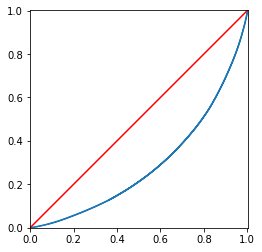

In [84]:
### Affichage de la courbe de Lorenz de la variable 'Credit amount' ###

import matplotlib.pyplot as plt

credits = df['Credit amount'].values
n = len(credits)
courbe_lorenz = np.cumsum(np.sort(credits)) / credits.sum()
courbe_lorenz = np.append([0], courbe_lorenz) # La courbe de Lorenz commence à 0

x_axis = np.linspace(0 - 1 / n , 1 + 1 / n , n + 1) # il y a un segment de taille n pour chaque individu
# plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0 - 1 / n, et le dernier termine à 1 + 1 / n

plt.plot(x_axis, courbe_lorenz, drawstyle = 'steps-post')
plt.plot(x_axis, x_axis, color = 'r')

plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

#### L'indice de Gini
Comme la courbe de Lorenz n'est pas une statistique à proprement parler, l'**indice de Gini** a été créé et se base sur cette courbe.

Il mesure l'aire présente entre la première bissectrice sur le graphique et la courbe de Lorenz, à la manière suivante :
<img src="img/image_indice_gini.jpeg" alt="Image Openclassrooms indice de Gini" width="600" height="200"/>

Mathématiquement, il suffit tout simplement de multiplier par 2 cette aire notée $S$ :
$$
gini = 2 \times S
$$

In [85]:
### Calcul de l'indice de Gini de la variable 'Credit amount' ###

AUC = (courbe_lorenz.sum() - courbe_lorenz[-1] / 2 - courbe_lorenz[0] / 2) / n # surface sous la courbe de Lorenz
# le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2,
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1

S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2 * S

gini

0.4234272078172949

D'après l'indice de Gini calculé, on peut en déduire que la variable 'Credit amount' n'est pas répartie de manière très égalitaire.

## Analyse des variables qualitatives du jeu de données
Une deuxième étape très importante est l'analyse descriptive des variables qualitatives.
Ces variables regroupent tous ce qui n'est pas un nombre, ce qui les rend en général plus difficile à manipuler car les calculs mathématiques ne sont justement réalisables que sur des nombres.

Ainsi, le fait de déterminer les modalités d'une variable qualitative et l'importance de chacune est déjà un bout de chemin supplémentaire vers la compréhension de nos données.

In [86]:
# Sélection des variables catégorielles à l'aide de la méthode select_dtypes
df_cat = df.select_dtypes(include = ['O'])

df_cat.head()

,Purpose,Status of existing checking account,Credit history,Savings account/bonds,Present employment since,Personal status and sex,Other debtors/guarantors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker,Accounts
0,A40,A14,A32,A61,A75,A93,A101,A122,A143,A152,A174,A192,A201,A14-A61
1,A40,A12,A32,A61,A73,A92,A101,A122,A143,A151,A172,A192,A201,A12-A61
2,A40,A11,A34,A61,A75,A93,A101,A121,A143,A152,A173,A191,A201,A11-A61
3,A40,A12,A33,A65,A73,A92,A101,A123,A143,A151,A173,A192,A201,A12-A65
4,A40,A11,A34,A61,A73,A93,A101,A121,A143,A151,A173,A191,A201,A11-A61


In [87]:
# Sélection manuelle des variables catégorielles
df_cat = df[['Status of existing checking account',
             'Credit history',
             'Purpose',
             'Savings account/bonds',
             'Present employment since',
             'Personal status and sex',
             'Other debtors/guarantors',
             'Property',
             'Other installment plans',
             'Housing',
             'Job',
             'Telephone',
             'Foreign worker',
             'Accounts',
             'Installment rate',
             'Present residence since',
             'Number of existing credits',
             'Number of people being liable',
             'Risk']]

df_cat.head()

,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors/guarantors,Property,Other installment plans,Housing,Job,Telephone,Foreign worker,Accounts,Installment rate,Present residence since,Number of existing credits,Number of people being liable,Risk
0,A14,A32,A40,A61,A75,A93,A101,A122,A143,A152,A174,A192,A201,A14-A61,2,4,1,1,0
1,A12,A32,A40,A61,A73,A92,A101,A122,A143,A151,A172,A192,A201,A12-A61,3,4,1,1,1
2,A11,A34,A40,A61,A75,A93,A101,A121,A143,A152,A173,A191,A201,A11-A61,4,4,2,1,0
3,A12,A33,A40,A65,A73,A92,A101,A123,A143,A151,A173,A192,A201,A12-A65,4,4,2,1,0
4,A11,A34,A40,A61,A73,A93,A101,A121,A143,A151,A173,A191,A201,A11-A61,2,2,2,2,0


### Visualier les modalités (et les fréquences) d'une variable qualitative

In [88]:
# Affichage des fréquences des modalités de la variable 'Risk'
df_cat['Risk'].value_counts(normalize = True) * 100

0    69.99003
1    30.00997
Name: Risk, dtype: float64

On constate que 70% des crédits accordés représentent un mauvais risque. Ce chiffre a peu d'intérêt si on ne le met pas en perspective avec le montant des crédits accordés et leurs durées.

### Découpage de nos données en quantiles

In [89]:
# Découpage des montants de crédits en 4 classes selon les 3 quantiles de la nouvelle variable 'amount_classes' créée
df['amount_classes'] = pd.qcut(df['Credit amount'], q = 4, labels = [0, 1, 2, 3])

df

,Purpose,Status of existing checking account,Duration,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Other installment plans,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk,Accounts,amount_classes
0,A40,A14,60.0,A32,10366.0,A61,A75,2,A93,A101,...,A143,A152,1,A174,1,A192,A201,0,A14-A61,3
1,A40,A12,24.0,A32,2718.0,A61,A73,3,A92,A101,...,A143,A151,1,A172,1,A192,A201,1,A12-A61,2
2,A40,A11,21.0,A34,571.0,A61,A75,4,A93,A101,...,A143,A152,2,A173,1,A191,A201,0,A11-A61,0
3,A40,A12,24.0,A33,1965.0,A65,A73,4,A92,A101,...,A143,A151,2,A173,1,A192,A201,0,A12-A65,1
4,A40,A11,9.0,A34,2799.0,A61,A73,2,A93,A101,...,A143,A151,2,A173,2,A191,A201,0,A11-A61,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,A49,A14,12.0,A34,1264.0,A65,A75,4,A93,A101,...,A143,A151,1,A172,1,A191,A201,0,A14-A65,0
999,A49,A12,48.0,A33,6681.0,A65,A73,4,A93,A101,...,A143,A153,1,A173,2,A192,A201,0,A12-A65,3
1000,A49,A14,24.0,A33,2375.0,A63,A73,4,A93,A101,...,A143,A152,2,A173,2,A192,A201,0,A14-A63,2
1001,A49,A11,18.0,A30,3104.0,A61,A74,3,A93,A101,...,A141,A152,1,A173,1,A192,A201,0,A11-A61,2


### Grouper les éléments d'un DataFrame

La méthode `groupby` permet de **grouper les lignes** d'un DataFrame qui partagent une valeur commune sur une colonne.

Cette méthode ne renvoie pas un DataFrame. L'objet renvoyé par la méthode groupby est un objet de la classe **DataFrameGroupBy**.

Cette classe permet de réaliser des opérations comme le calcul de statistiques (somme, moyenne, maximum, etc.) pour chaque modalité de la colonne sur laquelle on groupe les lignes.

La structure générale d'une **opération groupby** est la suivante:
- **Séparation** des données (**Split**).
- **Application** d'une fonction (**Apply**).
- **Combinaison** des résultats (**Combine**).

Voici un exemple provenant du superbe cours "*Pandas pour la Data Science - Data processing*", de [DataScientest](https://datascientest.com) :
<img src="img/image_groupby_pandas.png" alt="Image DataScientest méthode groupby" width="1000" height="500"/>

Il est possible de spécifier pour chaque colonne quelle fonction doit être utilisée à l'étape **Application** d'une opération `groupby`. Pour cela, on utilise la méthode `agg` de la classe `DataFrameGroupBy` en lui renseignant un dictionnaire où chaque **clé** est le **nom d'une colonne** et la **valeur** est la **fonction à appliquer**.

In [90]:
# Comparaison du montant des crédits par rapport aux variables qualitatives 'amount_classes' et 'Risk'
resume_credit_amount = df.groupby(['amount_classes', 'Risk']).agg({'Credit amount': 'sum'})

resume_credit_amount

Credit amount
amount_classes Risk               
0              0          170886.0
               1           78868.0
1              0          333346.0
               1          113857.0
2              0          596367.0
               1          170938.0
3              0          996256.0
               1          819070.0

Le montant en soit ne nous donne aucune information exploitable, on peut donc affiner notre analyse en présentant les montants sous forme de répartition :

In [91]:
# Calcul de la répartition des montants en fonction des quantiles de la variable 'Credit amount'
for i in [0, 1, 2, 3]:
    somme_amount = df.loc[df['amount_classes'] == i].sum()
    resume_credit_amount.loc[i, 0] = resume_credit_amount.loc[i, 0] / somme_amount
    resume_credit_amount.loc[i, 1] = resume_credit_amount.loc[i, 1] / somme_amount
    
resume_credit_amount

Credit amount
amount_classes Risk               
0              0          0.684217
               1          0.315783
1              0          0.745402
               1          0.254598
2              0          0.777223
               1          0.222777
3              0          0.548803
               1          0.451197

On remarque qu'il y a environ 45% des crédits dont le montant se situe dans le troisième quartile ( > 3975.5 DM) qui ne sont pas remboursés et correspondent donc à un mauvais risque alors qu'environ 78% des crédits situés dans le deuxième quartile ( < 2319 DM) sont correctement remboursés et correspondent à un bon risque.

Les crédits dont les montants sont les plus faibles ( < 1364 DM) présentent un plus gros risques que ceux cités précédemment avec environ 31% de défauts de paiements.

On ne peut donc pas déterminer une tendance sur la base de ces simples statistiques, il faut donc croiser cela avec d'autres variables pour véritablement comprendre quels sont les crédits qui présentent les plus gros risques pour l'entreprise.

In [92]:
# Découpage des durées de crédits en 4 classes selon les 3 quantiles de la nouvelle variable 'duration_classes' créée
df['duration_classes'] = pd.qcut(df['Duration'], q = 4, labels = [0, 1, 2, 3])

df

,Purpose,Status of existing checking account,Duration,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate,Personal status and sex,Other debtors/guarantors,...,Housing,Number of existing credits,Job,Number of people being liable,Telephone,Foreign worker,Risk,Accounts,amount_classes,duration_classes
0,A40,A14,60.0,A32,10366.0,A61,A75,2,A93,A101,...,A152,1,A174,1,A192,A201,0,A14-A61,3,3
1,A40,A12,24.0,A32,2718.0,A61,A73,3,A92,A101,...,A151,1,A172,1,A192,A201,1,A12-A61,2,2
2,A40,A11,21.0,A34,571.0,A61,A75,4,A93,A101,...,A152,2,A173,1,A191,A201,0,A11-A61,0,2
3,A40,A12,24.0,A33,1965.0,A65,A73,4,A92,A101,...,A151,2,A173,1,A192,A201,0,A12-A65,1,2
4,A40,A11,9.0,A34,2799.0,A61,A73,2,A93,A101,...,A151,2,A173,2,A191,A201,0,A11-A61,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,A49,A14,12.0,A34,1264.0,A65,A75,4,A93,A101,...,A151,1,A172,1,A191,A201,0,A14-A65,0,0
999,A49,A12,48.0,A33,6681.0,A65,A73,4,A93,A101,...,A153,1,A173,2,A192,A201,0,A12-A65,3,3
1000,A49,A14,24.0,A33,2375.0,A63,A73,4,A93,A101,...,A152,2,A173,2,A192,A201,0,A14-A63,2,2
1001,A49,A11,18.0,A30,3104.0,A61,A74,3,A93,A101,...,A152,1,A173,1,A192,A201,0,A11-A61,2,1


In [93]:
# Comparaison du montant des crédits par rapport aux variables qualitatives 'duration_classes' et 'Risk'
resume_credit_duration = df.groupby(['duration_classes', 'Risk']).agg({'Duration': 'sum'})

for i in [0, 1, 2, 3]:
    somme_duration = df[df['duration_classes'] == i].sum()
    resume_credit_duration.loc[i, 0] = resume_credit_duration.loc[i, 0] / somme_duration
    resume_credit_duration.loc[i, 1] = resume_credit_duration.loc[i, 1] / somme_duration
    
resume_credit_duration

Duration
duration_classes Risk          
0                0     0.769966
                 1     0.230034
1                0     0.693528
                 1     0.306472
2                0     0.704190
                 1     0.295810
3                0     0.539806
                 1     0.460194

En creusant la variable 'Duration', on remarque une tendance qui nous amène à croire que plus les crédits sont longs à rembourser, plus ils seront classifiés comme mauvais risque.

Les pourcentages pour le troisième quartile sont très similaires à ceux du troisième quartile de la variable 'Credit amount' étudié précédemment, il faut donc vérifier s'il s'agit bien des mêmes crédits pour ces 2 variables-là.

In [94]:
# Fréquences des crédits dont les montants et les durées sont supérieurs à la valeur de leurs troisièmes quartiles
df.loc[(df['Credit amount'] > 3972.5) & (df['Duration'] > 24)]['Risk'].value_counts(normalize = True) * 100

0    54.248366
1    45.751634
Name: Risk, dtype: float64

In [95]:
# Comptage des crédits dont les montants et les durées sont supérieurs à la valeur de leurs troisièmes quartiles
df.loc[(df['Credit amount'] > 3972.5) & (df['Duration'] > 24)]['Risk'].value_counts()

0    83
1    70
Name: Risk, dtype: int64

Peut-on avoir une idée de l'intervalle d'âge le plus risqué ?

In [96]:
# Statistique sur l'âge des individus selon les modalités de la variables 'Risk'
age_cible = df.groupby(['Risk']).agg({'Age': ['median', 'mean', 'min', 'max']})

age_cible

Age                   
     median       mean min max
Risk                          
0        34  36.267806  19  75
1        31  33.933555  19  74

In [97]:
# Calcul de l'étendue des valeurs d'âge en faisant la différence entre la valeur minimum et maximum
age_cible['Age', 'diff_max_min'] = age_cible.loc[:, (['Age'], ['max'])].values - age_cible.loc[:, (['Age'], ['min'])].values

age_cible

Age                                
     median       mean min max diff_max_min
Risk                                       
0        34  36.267806  19  75           56
1        31  33.933555  19  74           55

Les statistiques en rapport avec l'âge des clients sont pratiquement les mêmes qu'ils soient solvables ou non, avec une moyenne très proche de la médiane, on ne peut donc pas raisonnablement cibler une classe d'âge plus sensiblement plus risqué qu'une autre.

Est-ce qu'une personne ayant peu d'argents sur ses comptes est plus risquée qu'une autre ?

In [98]:
#A11 : ... < 0 DM
#A12 : 0 <= ... < 200 DM
#A13 : ... >= 200 DM / salary assignments for at least 1 year
#A14 : no checking account

# Comparaison du nombre d'individus par modalité de la variable 'Status of existing checking account' selon la variable 'Risk'
resume_checking_account_status = df.groupby(['Status of existing checking account', 'Risk']).agg({'Status of existing checking account': 'count'})

# Calcul de la répartition du nombre d'individus en fonction des modalités des 2 variables qualitatives précédentes
for i in ['A11', 'A12', 'A13', 'A14']:
    compte_checking_account_status = df.loc[df['Status of existing checking account'] == i].count()
    resume_checking_account_status.loc[i, 0] = resume_checking_account_status.loc[i, 0] / compte_checking_account_status
    resume_checking_account_status.loc[i, 1] = resume_checking_account_status.loc[i, 1] / compte_checking_account_status

resume_checking_account_status

Status of existing checking account
Status of existing checking account Risk                                     
A11                                 0                                0.509091
                                    1                                0.490909
A12                                 0                                0.608856
                                    1                                0.391144
A13                                 0                                0.777778
                                    1                                0.222222
A14                                 0                                0.883249
                                    1                                0.116751

In [99]:
#A61 : ... < 100 DM (Deutsche Mark)
#A62 : 100 <= ... < 500 DM
#A63 : 500 <= ... < 1000 DM
#A64 : .. >= 1000 DM
#A65 : unknown/ no savings account

# Comparaison du nombre d'individus par modalité de la variable 'Savings account/bonds' selon la variable 'Risk'
resume_savings_account = df.groupby(['Savings account/bonds', 'Risk']).agg({'Savings account/bonds': 'count'})

# Calcul de la répartition du nombre d'individus en fonction des modalités des 2 variables qualitatives précédentes
for i in ['A61', 'A62', 'A63', 'A64', 'A65']:
    compte_savings_account = df.loc[df['Savings account/bonds'] == i].count()
    resume_savings_account.loc[i, 0] = resume_savings_account.loc[i, 0] / compte_savings_account
    resume_savings_account.loc[i, 1] = resume_savings_account.loc[i, 1] / compte_savings_account

resume_savings_account

Savings account/bonds
Savings account/bonds Risk                       
A61                   0                  0.639073
                      1                  0.360927
A62                   0                  0.673077
                      1                  0.326923
A63                   0                  0.825397
                      1                  0.174603
A64                   0                  0.875000
                      1                  0.125000
A65                   0                  0.826087
                      1                  0.173913

Est-ce qu'une catégorie de crédit est plus risquée qu'une autre ?

In [100]:
#A40 : car (new)
#A41 : car (used)
#A42 : furniture/equipment
#A43 : radio/television
#A44 : domestic appliances
#A45 : repairs
#A46 : education
#A47 : (vacation - does not exist?)
#A48 : retraining
#A49 : business
#A410 : others

# Comparaison du nombre d'individus par modalité de la variable 'Purpose' selon la variable 'Risk'
resume_credit_purpose = df.groupby(['Purpose', 'Risk']).agg({'Purpose': 'count'})

resume_credit_purpose

Purpose
Purpose Risk         
A40     0         146
        1          89
A41     0          86
        1          17
A410    0           7
        1           5
A42     0         123
        1          58
A43     0         219
        1          63
A44     0           8
        1           4
A45     0          14
        1           8
A46     0          28
        1          22
A48     0           8
        1           1
A49     0          63
        1          34

In [101]:
# Calcul de la répartition du nombre d'individus en fonction des modalités des 2 variables qualitatives précédentes
for i in ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49', 'A410']:
    compte_credit_purpose = df.loc[df['Purpose'] == i].count()
    resume_credit_purpose.loc[i, 0] = resume_credit_purpose.loc[i, 0] / compte_credit_purpose
    resume_credit_purpose.loc[i, 1] = resume_credit_purpose.loc[i, 1] / compte_credit_purpose

resume_credit_purpose

Purpose
Purpose Risk          
A40     0     0.621277
        1     0.378723
A41     0     0.834951
        1     0.165049
A410    0     0.583333
        1     0.416667
A42     0     0.679558
        1     0.320442
A43     0     0.776596
        1     0.223404
A44     0     0.666667
        1     0.333333
A45     0     0.636364
        1     0.363636
A46     0     0.560000
        1     0.440000
A48     0     0.888889
        1     0.111111
A49     0     0.649485
        1     0.350515

In [102]:
# Calcul de la somme des variables 'Credit amount' et 'Duration' groupées par 'Purpose' et 'Risk'
stats_credit_purpose = df.groupby(['Purpose', 'Risk']).agg({'Credit amount': 'sum', 'Duration': 'sum'})

# Approximation du montant par mois
stats_credit_purpose['Montant par mois'] = stats_credit_purpose['Credit amount'] / stats_credit_purpose['Duration']

stats_credit_purpose
#A41 : car (used)
#A410 : others
#A49 : business

Credit amount  Duration  Montant par mois
Purpose Risk                                           
A40     0          414383.0    2441.0        169.759525
        1          308231.0    1907.0        161.631358
A41     0          413837.0    2141.0        193.291453
        1          139296.0     543.0        256.530387
A410    0           40682.0     208.0        195.586538
        1           57830.0     180.0        321.277778
A42     0          343686.0    2172.0        158.234807
        1          211439.0    1320.0        160.181061
A43     0          525339.0    4053.0        129.617321
        1          173668.0    1578.0        110.055767
A44     0           11692.0     109.0        107.266055
        1            6284.0      93.0         67.569892
A45     0           37689.0     267.0        141.157303
        1           22329.0     153.0        145.941176
A46     0           87429.0     538.0        162.507435
        1           71591.0     517.0        138.473888
A48     0            9951.0      94.0        105.861702
        1             902.0      12.0         75.166667
A49     0          212167.0    1446.0        146.726833
        1          191163.0    1167.0        163.807198

Ce tableau nous montre qu'en montant, sur tout l'argent qui a été prêté pour toutes les catégories, il y a plus d'argents qui n'a pas été remboursé sur les crédits des catégories A41, A410 et A49 que d'argent qui a été correctement remboursé.

In [103]:
df['Credit amount'].sum()

3279588.0

## Analyse des corrélations entre les variables du jeu de données

L'analyse des liaisons entre variables passe par l'étude des corrélations entre elles. Il faut distinguer 3 niveaux d'analyse : entre les variables quantitatives, entre les variables qualitatives, entre les variables qualitatives et quantitatives. Pour chaque niveau d'analyse, il faut répondre à cette question : y a-t-il dépendance ou indépendance entre les variables et dans quelle mesure ?

Pour tester l'indépendance de variables lorsque les variables sont quantitatives, le test de corrélation de Pearson s'impose.

Un test statistique est une procédure de décision entre deux hypothèses. Il s'agit d'une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle  $H_0$  , en fonction d'un jeu de données.

N.B : "Ne pas rejeter" une hypothèse ne signifie pas forcément l'accepter.

Dans le cas du test de corrélation de **Pearson**, l'hypothèse nulle est la suivante :
$$
H_0: \text{"Les deux variables testées sont indépendantes"}
$$

Pour rejeter ou non cette hypothèse, on regarde la p-value du test. Si cette dernière est en dessous de 5%, on rejette $H_0$.

Il convient de définir la notion de p-value : la p-value est la probabilité, sous $H_0$, d’obtenir une statistique aussi extrême (pour ne pas dire aussi grande) que la valeur observée sur l’échantillon. Elle représente la probabilité de rejeter l'hypothèse nulle si elle est vraie. Plus la p-value est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible.

Pour mesurer la corrélation entre les deux variables, on s'appuiera sur le coefficient de corrélation de **Pearson**.

Le coefficient de corrélation de Pearson est une formule qui permet de quantifier la relation linéaire entre deux variables : le coefficient est un réel entre -1 et 1 avec :
- 1 les variables sont corrélées
- 0 les variables sont décorrélées
- -1 les variables sont corrélées négativement

Des corrélations positives impliquent qu'à mesure que x augmente, il en va de même pour y. Les corrélations négatives impliquent que lorsque x augmente, y diminue.

Le coefficient de Pearson est obtenu par la formule :
$$
pearsonr = \frac{cov(X, Y)}{\sigma_X.\sigma_Y}
$$

- $cov(X,Y)$ est la covariance entre $X$ et $Y$
- $\sigma_X$ l'écart type de $X$
- $\sigma_Y$ l'écart type de $Y$

In [104]:
# Import du sous-module stats de la librairie scipy qui permet d'effectuer des tests statistiques
import scipy.stats as st

In [105]:
# Test de corrélation de Pearson entre les variables 'Credit amount' et 'Duration'
pearsonr_age_creditAmount = st.pearsonr(df['Credit amount'], df['Duration'])
print("Le test de corrélation de Pearson entre les variables 'Credit amount' et 'Duration' peut se résumer de la manière suivante :",
      pearsonr_age_creditAmount)

print("\n")
print("La valeur du coefficient de Pearson de ce test est de", pearsonr_age_creditAmount[0])
print("La p-value du test de corrélation de Pearson est de", pearsonr_age_creditAmount[1])

Le test de corrélation de Pearson entre les variables 'Credit amount' et 'Duration' peut se résumer de la manière suivante : (0.6249444373911891, 9.217866690437407e-110)


La valeur du coefficient de Pearson de ce test est de 0.6249444373911891
La p-value du test de corrélation de Pearson est de 9.217866690437407e-110


La p-value est inférieure à 5% et le coefficient est proche de 1, il y a donc une corrélation modérée entre les deux variables.

On peut alors en déduire qu'en général, lorsque le montant d'un crédit augmente, sa durée aussi.

In [106]:
# Affichage de la matrice de corrélation (de Pearson par défaut) de notre jeu de données df
matrice_correlation = df.corr()

matrice_correlation = matrice_correlation.loc[['Age', 'Credit amount', 'Duration']].drop(['Installment rate',
                                                                                          'Present residence since',
                                                                                          'Number of existing credits',
                                                                                          'Number of people being liable',
                                                                                          'Risk'], axis = 1)

matrice_correlation = matrice_correlation[['Age', 'Credit amount', 'Duration']]

matrice_correlation

,Age,Credit amount,Duration
Age,1.000000,0.031180,-0.038672
Credit amount,0.031180,1.000000,0.624944
Duration,-0.038672,0.624944,1.000000


Les variables 'Age' et 'Credit amount' ainsi que 'Age' et 'Duration' sont fortement décorrélées (pearsonr ~ 0.0). Cela signifie que l'âge d'une personne n'influence pas du tout le montant d'un crédit ni sa durée.

Lorsque les variables sont qualitatives, un test de corrélation de Pearson n'est alors pas adapté. Pour cela, on commence par utiliser la table de contingence. On appelle une table de contingence, la table croisée contenant les différentes catégories des deux variables en question.

Pour afficher une table de contingence, il faut utiliser la fonction `pandas.crosstab` avec les deux variables en argument.

Cette table de contingence permet de visualiser comment se distribuent les catégories de la variable 1 au sein de la variable 2. Pour des variables totalement indépendantes, la distribution doit être proportionnelle entre chaque ligne et entre chaque colonne.

In [107]:
table_contingence_risk_purpose = pd.crosstab(df['Risk'], df['Purpose'])

table_contingence_risk_purpose

Purpose,A40,A41,A410,A42,A43,A44,A45,A46,A48,A49
Risk,,,,,,,,,,
0,146,86,7,123,219,8,14,28,8,63
1,89,17,5,58,63,4,8,22,1,34


Le test qu'on effectue alors est un test du $\chi^2$  par table de contingence. Pour chaque case d'un tableau, il effectue un test du $\chi^2$ (test de proportions) entre l'effectif de la case et l'effectif total de la colonne. La statistique de test est alors obtenue en faisant la somme de toutes ces statistiques.

Pour ce test, on pose comme hypothèse nulle:
$$
H_0: \text{"les variables 'Risk' et 'Purpose' sont indépendantes"}
$$

Ce test peut s'effectuer tout simplement grâce à la fonction `chi2_contingency` de scipy appliquée à la table de contingence. Elle renvoie un array de 4 éléments : la statistique du test, la p-value, le degré de liberté et la liste des fréquences attendues. Pour rejeter l'hypothèse nulle, il est nécessaire que la p-value soit inférieure à 5%.

In [108]:
test_chi2_risk_purpose = st.chi2_contingency(table_contingence_risk_purpose)

chi_2_risk_purpose = test_chi2_risk_purpose[0]
p_value_risk_purpose = test_chi2_risk_purpose[1]
ddl_risk_purpose = test_chi2_risk_purpose[2]

print(chi_2_risk_purpose, p_value_risk_purpose, ddl_risk_purpose)

32.73995618990034 0.0001482117844201167 9


Comme pour les variables quantitatives, on peut mesurer le niveau de corrélation entre deux variables qualitatives. Pour cela, on utilise le **V de Cramer** corrigé pour contrer le biais qui utilise les résulats du test du $\chi^2$ . Il renvoie une valeur entre 0 et 1. Il se calcule comme ceci :

$$
V = \sqrt{\frac{\phi^2}{min(\tilde{k} - 1, \tilde{r} - 1)}}
$$
$$
\phi^2 = max(0, \frac{\chi^2}{N} - \frac{(k - 1)(r - 1)}{N - 1})
$$
$$
\tilde{k} = k - \frac{(k - 1)^2}{N - 1}
$$
$$
\tilde{r} = r - \frac{(r - 1)^2}{N - 1}
$$
avec :
- $\chi^2$ la statistique du test du $\chi^2$ .
- N le nombre d'observations du jeu de données.
- k le nombre de colonne du tableau de contingence.
- r le nombre de ligne du tableau de contingence.

In [109]:
# Import de la fonction sqrt du module math
from math import sqrt

# Définition d'une fonction V_cramer qui prend en argument un tableau de contingence, le nombre d'observation et renvoie la valeur du V de Cramer
def V_cramer(table_contingence, N):
    """
    Cette fonction calcule la valeur du V de Cramer.

    Paramètres:
        table_contingence : la table de contingence des variables à tester.
        N : le nombre d'observations du DataFrame contenant les variables à tester.

    Renvoie:
        La valeur du V de Cramer.
    """
    
    # Détermination de la statistique du test du χ², du nombre de colonne k et du nombre ligne du tableau de contingence r
    statistique_chi2 = st.chi2_contingency(table_contingence)[0]
    k = table_contingence.shape[1]
    r = table_contingence.shape[0]
    
    # Calcul de phi²
    phi2 = max(0, (statistique_chi2 / N - (((k - 1)*(r - 1)) / (N - 1))))
    
    # Calcul de k_tilde
    k_tilde = k - (np.square(k - 1) / (N - 1))
    
    # Calcul de r_tilde
    r_tilde = r - (np.square(r - 1) / (N - 1))
    
    # Calcul du V de Cramer
    V_cramer_value = np.sqrt(phi2 / min(k_tilde - 1, r_tilde - 1))
    
    return V_cramer_value

In [110]:
# Application de la fonction V_cramer à la table de contingence précédente
V_cramer(table_contingence_risk_purpose, df.shape[0])

0.1538948684305993

Le V de Cramer n'est pas très élevé. On en déduit qu'il n'y a pas une forte corrélation entre les deux variables mais qu'elle n'est pas non plus négligeable.

Une dernière étape consiste à étudier les relations entre variables quantitatives et qualitatives.

Dans ce but, on utilisera l'analyse de la variance (**ANOVA**) à un facteur qui permet de comparer les moyennes d'échantillon.

L'objectif de ce test est de conclure sur l'influence d'une variable explicative catégorielle sur la loi d'une variable continue à expliquer.

Considérons une variable catégorielle telle que 'Installment rate' et la variable numérique 'Duration'. 'Installment rate' compte 4 modalités différentes. On définit les moyennes $\mu_1, \mu_2, \mu_3, \mu_4$ qui correspondent à la moyenne des durées de crédits (**Duration**) pour les 4 modalités. Le raisonnement simple que l'on fait avec ANOVA est que si la variable 'Installment rate' n'a pas d'incidence sur 'Duration', la moyenne devrait être identique pour les 4 modalités soient $\mu_1 = \mu_2 = \mu_3 = \mu_4$.

On définit donc l'hypothèse nulle :
$$
H_0:"\mu_1 = \mu_2 = \mu_3 = \mu_4"
$$

Dans la pratique la méthode **ANOVA** s'intéresse à la variation interclasse, intraclasse et à la variation totale notées respectivement SCE, SCR et SCT. Considérons les modalités d'une variable qualitative au nombre de k et  nini  les effectifs de chacune des modalités i :

$$
SCE = \sum_{i=1}^{k}n_i(\bar{y_i} - \bar{y})^2
$$
$$
SCR = \sum_{i=1}^{k}\sum_{j=1}^{n_i}(y_{ij} - \bar{y_i})^2
$$
$$
SCT = \sum_{i=1}^{n}(y_i - \bar{y})^2 = \sum_{i=1}^{k}\sum_{j=1}^{n_i}(\bar{y_{ij}} - \bar{y})^2 = SCR + SCE
$$

où :
- $y_{ij}$ correspond à la $j$ème observation de la modalité
- $\bar{y_i}$ correspond à la moyenne des observations appartenant à la modalité i
- $\bar{y}$ est la moyenne de toutes les observations (la moyenne des moyennes de chaque modalité)

Dans notre cas $k$ = 4, $n$ = 1003 et les $n_i$ représente le nombre d'individus dans la classe $i$.

On peut maintenant définir la statistique de test notée F :
$$
F = \frac{\frac{SCE}{k - 1}}{\frac{SCR}{n - k}}
$$

Il est connu que cette statistique suit une loi de Fisher de paramètre $(k-1, n-k)$.  En s'appuyant sur la valeur de cette statistique et de la p-value associé, on peut conclure sur l'influence ou non de la variable 'Installment rate' sur la variable 'Duration'.

On rejette $H_0$ si la p-value est inférieure à 5%. Rejeter $H_0$ signifie ici rejeter l'hypothèse selon laquelle 'Installment rate' n'influe pas sur 'Duration'.

In [111]:
# Création du dictionnaire associant l'ancien nom au nouveau nom de la colonne que l'on veut renommer
dict_rename_installmentRate = {'Installment rate': 'Installment_rate'}

# On renomme la variable concernée grâce à la méthode rename
df = df.rename(dict_rename_installmentRate, axis = 1)

In [112]:
# Import du module statsmodels.api permettant d'effectuer une analyse de la variance
import statsmodels.api

# Etude de la relation entre 'Duration' et 'Installment_rate' via l'utilisation d'ANOVA
anova_duration_installmentRate = statsmodels.formula.api.ols('Duration ~ Installment_rate', data = df).fit()
table_anova_duration_installmentRate = statsmodels.api.stats.anova_lm(anova_duration_installmentRate)

# Affichage des résultats de l'ANOVA
table_anova_duration_installmentRate

,df,sum_sq,mean_sq,F,PR(>F)
Installment_rate,1.0,790.045285,790.045285,5.461999,0.019631
Residual,1001.0,144788.624705,144.643981,NaN,NaN


La p-value PR(>F) est inférieure à 5% donc on rejette l'hypothèse selon laquelle la variable 'Duration' n'influe pas sur la variable 'Installment_rate'.

Cela signifie donc que la durée d'un crédit influe effectivement sur son taux de versement.

In [113]:
# Création du dictionnaire associant l'ancien nom au nouveau nom de la colonne que l'on veut renommer
dict_rename_creditAmount = {'Credit amount': 'Credit_amount'}

# On renomme la variable concernée grâce à la méthode rename
df = df.rename(dict_rename_creditAmount, axis = 1)

#A171 : unemployed/ unskilled - non-resident
#A172 : unskilled - resident
#A173 : skilled employee / official
#A174 : management/ self-employed / highly qualified employee / officer
df['Job'] = df['Job'].replace(to_replace = ['A171', 'A172', 'A173', 'A174'], value = [171, 172, 173, 174])

# Etude de la relation entre 'Job' et 'Credit_amount' via l'utilisation d'ANOVA
anova_job_creditAmount = statsmodels.formula.api.ols('Job ~ Credit_amount', data = df).fit()
table_anova_job_creditAmount = statsmodels.api.stats.anova_lm(anova_job_creditAmount)

# Affichage des résultats de l'ANOVA
table_anova_job_creditAmount

,df,sum_sq,mean_sq,F,PR(>F)
Credit_amount,1.0,34.674980,34.674980,88.514198,3.343111e-20
Residual,1001.0,392.136585,0.391745,NaN,NaN


Comme précédemment, la p-value est inférieure à 5%, on peut donc dire avec certitude que le type d'emploi d'un individu influe sur le montant du crédit qu'il va emprunter.